## Project Challenge: Exploratory and predictive analytics upon the household market of Santiago de Chile, based on geo-spatial data, zone and area characteristics

### **_by Mia Hang Knudsen (s183998), Hanlu He (s183909), Jiafei Xia (s213084), Atefeh Hemmati Golsefidi (s216676)_**
---
## _Notebook 1/2: Exploratory analysis of data_
---
## Table of Contents
- [Part 1: <u>Introduction</u>](#intro)
- [Part 2: <u>Data Preparation</u>](#dataprep)
- [Part 3: <u>Data Cleaning and Exploratory Data Analysis</u>](#datacl)
- [Part 4: <u>Insight Exploration</u>](#insights)
- [Part 5: <u>Data Augmentation</u>](#dataaug)
- [Part 6: <u>Conclusion</u>](#ending)
---

<a id='intro'></a>
## Part 1: _<u>Introduction</u>_

Housing prices are an important reflection of the economy, and housing price ranges are of great interest for both buyers and sellers. In this project, our aim is to predict the type of household that will buy the house, given the area characteristics of the household and zone of the city. 

The area under study is Santiago de Chile. The provided dataset consists of data for ___18264 households explained by 30 variables i.e. area characteristics.___ We will use Machine Learning algorithms intended for Supervised Learning, in order to perform a classification of which household type would buy a house in some selected part of Santiago. The specific algorithms that we will use (Logistic Regression, Decision Trees, and Neural Network) will be presented in detail within a future part of this project.

Before being able to delve into the predictive analytics part, we first need to understand our dataset deeply, to manipulate it and eventually combine it with new attributes relevant to the topic. We will also need to clean the data, and, when we reach the ML modeling part, we will convert the data into usable matrices, which should be fed to the ML algorithms (_will be achieved in our final notebook_). 

---

<a id='dataprep'></a>
## Part 2: _<u>Data Preparation</u>_

In order to begin our analysis upon this dataset and understand what features it has, what they say about Santiago de Chile and its housing market, and utilize the dataset well for our Machine Learning task, we first need to prepare the data in a format that is clean, tidy and appropriate for our task. 

Let us begin by importing the necessary libraries that will be used throughout this Descriptive Analytics notebook, along with reading the Excel file where our household dataset resides.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import matplotlib.path as path
import seaborn as sns
import requests
import json
import utm
import math
import folium
import fiona
import branca

from IPython.display import display_html
from IPython.display import IFrame

pd.set_option('display.max_columns', 100)
# pd.options.display.float_format = '{:.4f}'.format

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_excel('Households Data.xlsx')

In [3]:
df.head()

,Hogar,EXCLUIR,paraValidacion,Sector,DirCoordX,DirCoordY,MontoArr,IngresoHogar,Factor,AnosEstudio,CLASE,Sup_Prom_Constr_Hab_EOD,Calid_EOD_norm_inv,DensConstr_EOD,Dist_est_Metro_MC_KM,Dist_salida_Autop_MC_KM,Tiempo_Com_Stgo,Ingreso_Promedio_Zona_MM,Acc_Comercio_tpte_pub,Acc_Educacion_tpte_pub,Acc_Habitacion_tpte_pub,Acc_Industria_tpte_pub,Acc_Servicios_tpte_pub,Acc_Comercio_auto,Acc_Educacion_auto,Acc_Habitacion_auto,Acc_Industria_auto,Acc_Servicios_auto,CLUSTER7,CLUSTER2
0,100010,0,0,7,335180.8019,6266420.975,100000,450845,136.393738,11,1,53.8,0.98,0.059,23.051711,4.345179,69,0.519765,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
1,100020,0,0,7,338410.2114,6265607.141,120000,1019369,73.843597,11,1,59.6,0.98,0.033,21.080177,1.381521,84,0.678317,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
2,100030,0,0,7,327863.8248,6257800.086,70000,80000,180.722809,10,1,59.5,0.98,0.004,34.147894,11.993389,83,0.408158,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
3,100041,0,0,7,327864.0000,6257800.000,80000,559259,150.379059,14,2,59.5,0.98,0.004,34.147817,11.993268,83,0.408158,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
4,100052,0,0,7,338480.8152,6267296.941,117771,710309,122.001518,12,2,43.6,0.98,0.086,19.908792,1.363177,94,0.498140,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1


As we can see above, since this dataset was collected by our supervisor's professional contact person in Chile, __Tomás Oettinger (_credits for the dataset_)__, all of its variables are presented to us in Spanish. Therefore, through asking questions regarding their purpose and translation, we are re-labeling the columns below to an English-speaking audience:

In [4]:
# Initially, we have written our English column names in the Dictionary sheet of the dataset, however that will not be available to everyone, 
# so we will just use the longer approach of saving the new names into a list
# ------------------------------------------------------------------------------------------------------------------------------------------

# metadata_df = pd.read_excel('Households Data.xlsx', sheet_name='Dictionary')

# column_names = metadata_df['English Names'].tolist()

# df.columns = column_names
# print(df.columns)

In [5]:
column_names = ['Household_ID', 'Excluded', 'Used_for_Validation', 'Sector', 'X', 'Y',
       'Monthly_Rent', 'Household_Income', 'Expansion_Factor',
       'Years_Education', 'Household_Type', 'Avg_Residential_Surface_Area',
       'Avg_Construction_Quality', 'Total_Building_Density_per_Zone',
       'KM_Nearest_Subway', 'KM_Nearest_Highway', 'CBD_Travel_Time',
       'Avg_Zonal_Income', 'Commerce_Accessibility_PT',
       'Education_Accessibility_PT', 'Household_Accessibility_PT',
       'Industry_Accessibility_PT', 'Services_Accessibility_PT',
       'Commerce_Accessibility_Car', 'Education_Accessibility_Car',
       'Household_Accessibility_Car', 'Industry_Accessibility_Car',
       'Services_Accessibility_Car', 'No_in_Cluster_7', 'No_in_Cluster_2']

In [6]:
df.columns = column_names

In [7]:
df.head()

,Household_ID,Excluded,Used_for_Validation,Sector,X,Y,Monthly_Rent,Household_Income,Expansion_Factor,Years_Education,Household_Type,Avg_Residential_Surface_Area,Avg_Construction_Quality,Total_Building_Density_per_Zone,KM_Nearest_Subway,KM_Nearest_Highway,CBD_Travel_Time,Avg_Zonal_Income,Commerce_Accessibility_PT,Education_Accessibility_PT,Household_Accessibility_PT,Industry_Accessibility_PT,Services_Accessibility_PT,Commerce_Accessibility_Car,Education_Accessibility_Car,Household_Accessibility_Car,Industry_Accessibility_Car,Services_Accessibility_Car,No_in_Cluster_7,No_in_Cluster_2
0,100010,0,0,7,335180.8019,6266420.975,100000,450845,136.393738,11,1,53.8,0.98,0.059,23.051711,4.345179,69,0.519765,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
1,100020,0,0,7,338410.2114,6265607.141,120000,1019369,73.843597,11,1,59.6,0.98,0.033,21.080177,1.381521,84,0.678317,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
2,100030,0,0,7,327863.8248,6257800.086,70000,80000,180.722809,10,1,59.5,0.98,0.004,34.147894,11.993389,83,0.408158,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
3,100041,0,0,7,327864.0000,6257800.000,80000,559259,150.379059,14,2,59.5,0.98,0.004,34.147817,11.993268,83,0.408158,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
4,100052,0,0,7,338480.8152,6267296.941,117771,710309,122.001518,12,2,43.6,0.98,0.086,19.908792,1.363177,94,0.498140,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1


This looks much better, doesn't it? There are a few things to note regarding this dataset, among which we mention:

* The X and Y coordinates are actually UTM-encoded, which means that we will need to be careful, and eventually convert such coordinates into Lat-Lon measurements for easier manipulation
* This dataset has initially been used by Prof. Oettinger in another Machine Learning challenge, with a different problem formulation and variables needed. Even though we have our own task, we should expect that this dataset has been somewhat processed and cleaned. ___That does not mean that we should not take our time to check for any data errors or clean-up needed, since, while doing so, we also understand much more regarding the actual underlying patterns in our dataset.___

There will be more comments to be made upon each individual variable, and we will mention them as we progress in the development of our analysis here.

---

For now, let us __check the size of our dataset__, the types of variables inferred by the Pandas library, to understand the data better:

In [8]:
len(df)

18264

It appears that the dataset, before any cleaning, has **18264 entries** of housing locations in Santiago, capital of Chile.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18264 entries, 0 to 18263
Data columns (total 30 columns):
Household_ID                       18264 non-null int64
Excluded                           18264 non-null int64
Used_for_Validation                18264 non-null int64
Sector                             18264 non-null int64
X                                  18264 non-null float64
Y                                  18264 non-null float64
Monthly_Rent                       18264 non-null int64
Household_Income                   18264 non-null int64
Expansion_Factor                   18264 non-null float64
Years_Education                    18264 non-null int64
Household_Type                     18264 non-null int64
Avg_Residential_Surface_Area       18264 non-null float64
Avg_Construction_Quality           18264 non-null float64
Total_Building_Density_per_Zone    18264 non-null float64
KM_Nearest_Subway                  18264 non-null float64
KM_Nearest_Highway                 18

From the data above, we can see that we are working with a numeric dataset (with all variables being represented in a numeric format, including the categorical "target" variable __Household_Type__). This will greatly help our efforts in using sklearn's Machine Learning algorithm libraries to process this data. 

It would appear that this data has no null variables, however let us not be tricked by this apparent result. _For example, a value of 0.0 could probably be considered as null or missing value, in some of our variables._

For us to have a deep understanding of the dataset, we will delve into each individual variable and try to understand what its distribution and possible range of values is, eventually cleaning up some necessary errors.<br>

---

<a id='datacl'></a>
## Part 3: _<u>Data Cleaning and Exploratory Data Analysis</u>_

#### 1. Cleaning `Household_ID` column

Here, we want to check if each household in the dataset has its own unique ID, which should be the case, since each entry is referring to a different household in Santiago.

In [10]:
print('Total number of the household IDs is: ' + str(len(df.Household_ID)))
print('In order to check for uniquity of IDs, we will also what the total number of unique household IDs is: ' + str(len(df.Household_ID.unique())))

Total number of the household IDs is: 18264
In order to check for uniquity of IDs, we will also what the total number of unique household IDs is: 18264


It appears to be so. Then the only manipulation task that we will do here is to change the stored type of this ID from `int` to `string`, since IDs, even though they are numbers, we don't want to treat them as numbers and perform mathematical operations on them, but just let them uniquely represent a household.

In [11]:
df.Household_ID = df.Household_ID.astype(str)

#### 2. Cleaning `Excluded` column

We are not sure we understand exactly what the "Excluded" column was used for.

Perhaps in the other research upon this dataset, they have had some basis of exclusion for some of the data, however this should not catch us off-guard, since we have a different task, and they values which they exclude might very well be useful for us.

__Let us check the distribution of data within this variable:__

In [12]:
df.Excluded.value_counts()

0    16047
1     2217
Name: Excluded, dtype: int64

In [13]:
# This function will allow us to display two pandas DataFrames side-by-side
# Credits for this function: `ntg` from https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
# ------------------------------------------------------------------------------------------------------------------------------------------

def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw = True)

In [14]:
print('Top:        EXCLUDED')
print('Bottom: NOT EXCLUDED')
print()

display_side_by_side(df[df.Excluded == True].describe(), df[df.Excluded == False].describe())

Top:        EXCLUDED
Bottom: NOT EXCLUDED



,Excluded,Used_for_Validation,Sector,X,Y,Monthly_Rent,Household_Income,Expansion_Factor,Years_Education,Household_Type,Avg_Residential_Surface_Area,Avg_Construction_Quality,Total_Building_Density_per_Zone,KM_Nearest_Subway,KM_Nearest_Highway,CBD_Travel_Time,Avg_Zonal_Income,Commerce_Accessibility_PT,Education_Accessibility_PT,Household_Accessibility_PT,Industry_Accessibility_PT,Services_Accessibility_PT,Commerce_Accessibility_Car,Education_Accessibility_Car,Household_Accessibility_Car,Industry_Accessibility_Car,Services_Accessibility_Car,No_in_Cluster_7,No_in_Cluster_2
count,2217.0,2217.000000,2217.000000,2217.000000,2.217000e+03,2.217000e+03,2.217000e+03,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000
mean,1.0,0.804240,3.739738,345900.390988,6.293905e+06,2.332432e+05,7.466313e+05,111.349298,-7.348218,-15.819576,55.859585,0.561516,0.437314,4.611919,2.160017,57.745602,0.754170,2441.720144,1363.466849,22159.333864,1764.291737,2764.453758,5927.919278,3386.173347,58220.869635,4999.700591,6434.377952,3.929635,1.223275
std,0.0,0.396874,1.823784,10815.051190,1.089110e+04,2.021561e+05,9.125262e+05,77.896652,42.345308,38.326016,27.734841,0.394403,0.503943,7.815085,2.649806,22.746429,0.433408,1454.522176,743.924471,10868.341243,1025.892128,1884.921159,1701.120258,919.570340,15197.632979,1367.825626,2067.048151,1.651362,0.416535
min,1.0,0.000000,1.000000,284961.606500,6.260379e+06,1.000000e+04,0.000000e+00,6.647559,-99.000000,-99.000000,0.000000,0.000000,0.000000,0.014242,0.012117,-99.000000,0.190000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,1.000000,1.000000
25%,1.0,1.000000,2.000000,340315.370300,6.285961e+06,1.200000e+05,3.000000e+05,63.533680,8.000000,1.000000,40.500000,0.000000,0.177000,0.782329,0.848531,44.000000,0.496044,1319.826790,842.474850,14549.141630,1021.275030,1224.307900,5174.760000,3085.110000,53571.190000,4489.260000,5156.410000,2.000000,1.000000
50%,1.0,1.000000,3.000000,347379.491200,6.295613e+06,1.571480e+05,5.375100e+05,92.318352,12.000000,2.000000,48.000000,0.780000,0.265000,1.728231,1.489116,56.000000,0.604893,2227.727910,1331.173130,22429.415290,1636.806360,2292.516180,6237.370000,3560.370000,61617.260000,5226.190000,6608.260000,5.000000,1.000000
75%,1.0,1.000000,5.000000,352775.943700,6.301336e+06,2.700000e+05,8.793170e+05,133.294937,12.000000,2.000000,71.700000,0.930000,0.463000,4.203842,2.584112,70.000000,0.844261,3604.168590,1959.464130,31178.507150,2436.061710,4120.813760,7098.720000,3997.780000,68900.360000,5905.130000,7981.610000,5.000000,1.000000
max,1.0,1.000000,7.000000,380254.955500,6.327817e+06,2.000000e+06,1.480000e+07,654.615540,24.000000,3.000000,203.000000,1.000000,4.599000,59.055760,21.284732,202.000000,4.277630,6096.118100,3151.932340,44854.376160,4536.557030,7713.396150,8583.060000,4670.060000,75774.780000,7260.030000,10000.680000,7.000000,2.000000
,Excluded,Used_for_Validation,Sector,X,Y,Monthly_Rent,Household_Income,Expansion_Factor,Years_Education,Household_Type,Avg_Residential_Surface_Area,Avg_Construction_Quality,Total_Building_Density_per_Zone,KM_Nearest_Subway,KM_Nearest_Highway,CBD_Travel_Time,Avg_Zonal_Income,Commerce_Accessibility_PT,Education_Accessibility_PT,Household_Accessibility_PT,Industry_Accessibility_PT,Services_Accessibility_PT,Commerce_Accessibility_Car,Education_Accessibility_Car,Household_Accessibility_Car,Industry_Accessibility_Car,Services_Accessibility_Car,No_in_Cluster_7,No_in_Cluster_2
count,16047.0,16047.0,16047.000000,16047.000000,1.604700e+04,1.604700e+04,1.604700e+04,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,

If we take a look at the above description of data between the __Excluded subset__ and the __Not Excluded subset__, we can clearly see that all of our variables seem to have ___very similar mean, standard deviation and quantile ranges for both categories___, with one exception: ___in some of the columns, the Except subset contains entries with `-99` as their values, most likely indicating a lack of response of a particular household to that survey question.___

Let us investigate further:

In [15]:
print('Total number of entries (rows) which come from EXCLUDED which contain missing data (i.e. -99 entries) is: ' + str(len(df[df.Excluded == True][df.isin([-99]).any(axis = 1) == True])))
print()
print('Total number of entries (rows) which come from NOT EXCLUDED which contain missing data (i.e. -99 entries) is: ' + str(len(df[df.Excluded == False][df.isin([-99]).any(axis = 1) == True])))

Total number of entries (rows) which come from EXCLUDED which contain missing data (i.e. -99 entries) is: 423

Total number of entries (rows) which come from NOT EXCLUDED which contain missing data (i.e. -99 entries) is: 0


---

Our finding appears to be indeed true, however let us please note that we have __2217__ excluded entries and only __423__ seem to have missing values of this form.

Instead of directly dropping all the _Excluded_ subset of data from our analysis, we will instead choose to only drop the entries with some values of `-99` to one of the questions, since we cannot easily predict what such data should have been in that field, and also since they are very few ___(2.31% of our dataset)___.

We are aware that we might find missing data further on, in other forms than represented just as `-99`, so we will not let our guard down.

Before we drop the above-mentioned entries, we have a strong hunch that the `Excluded` column might have something to do with the `used-for-validation` column. Therefore, let us also analyze this variable:

#### 3. Cleaning `Used_for_Validation` column

We assume that the data for which _Used_for_Validation_ is True have been used as validation set for the Machine Learning algorithms of the previous research upon the dataset. 

However, our project has a very clearly-defined training and test separation of data, which is diferent than the one Prof. Oettinger used before. 

Therefore, we are very inclined to drop this column, after receiving some insights about which data did he actually target.

In [16]:
len(df[df.Used_for_Validation == 1]) # How much of this data was used for validation?

1783

In [17]:
len(df[df.Excluded == True][df.Used_for_Validation == 1]) # How much of the Excluded data was used for validation?

1783

In [18]:
len(df[df.Excluded == False][df.Used_for_Validation == 1]) # How much of the Non-Excluded data was used for validation?

0

__It appears that all of the data used for validation actually comes from the _Excluded_ dataset__. 

This makes a lot of sense now, since we remember that we had __423 columns with missing entries__, and now we find __1783 columns used for model validation__, which, summed up, gives $423 + 1783 = 2206$. This is very close to our total number of __2217 excluded entries__, which means that, besides the 11 entries which have not yet been found why they were classified for being removed, we can now see that most of the `Excluded` variables actually shouldn't be excluded by us, since we are not using the same model validation subset as previously used.

In [19]:
print('Originally, the data used by Prof. Oettinger for model validation (Used_for_Validation) is %.2f%% of the original dataset.' % ((len(df[df.Excluded == True]) - len(df[df.Excluded == True][df.isin([-99]).any(axis = 1) == True])) / len(df) * 100))

Originally, the data used by Prof. Oettinger for model validation (Used_for_Validation) is 9.82% of the original dataset.


This data represents __~10% of our total dataset__, which can be saved by us from deletion after having performed this investigation.

In [20]:
df.drop(df[df.isin([-99]).any(axis = 1)].index, inplace = True)

___As mentioned before, we have dropped above the entries with missing values, after which we will also drop the columns `Excluded` and `Used_for_Validation`, since they are not necessary for our own project task.___

In [21]:
df.drop(columns = ['Excluded', 'Used_for_Validation'], inplace = True)

In [22]:
df.head()

,Household_ID,Sector,X,Y,Monthly_Rent,Household_Income,Expansion_Factor,Years_Education,Household_Type,Avg_Residential_Surface_Area,Avg_Construction_Quality,Total_Building_Density_per_Zone,KM_Nearest_Subway,KM_Nearest_Highway,CBD_Travel_Time,Avg_Zonal_Income,Commerce_Accessibility_PT,Education_Accessibility_PT,Household_Accessibility_PT,Industry_Accessibility_PT,Services_Accessibility_PT,Commerce_Accessibility_Car,Education_Accessibility_Car,Household_Accessibility_Car,Industry_Accessibility_Car,Services_Accessibility_Car,No_in_Cluster_7,No_in_Cluster_2
0,100010,7,335180.8019,6266420.975,100000,450845,136.393738,11,1,53.8,0.98,0.059,23.051711,4.345179,69,0.519765,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
1,100020,7,338410.2114,6265607.141,120000,1019369,73.843597,11,1,59.6,0.98,0.033,21.080177,1.381521,84,0.678317,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
2,100030,7,327863.8248,6257800.086,70000,80000,180.722809,10,1,59.5,0.98,0.004,34.147894,11.993389,83,0.408158,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
3,100041,7,327864.0000,6257800.000,80000,559259,150.379059,14,2,59.5,0.98,0.004,34.147817,11.993268,83,0.408158,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
4,100052,7,338480.8152,6267296.941,117771,710309,122.001518,12,2,43.6,0.98,0.086,19.908792,1.363177,94,0.498140,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1


#### 4. Cleaning `Sector` column

The Sector variable is very important to our dataset, since it represents in which sector does a particular house lie geographically, and we would expect houses in the same sector to share some characteristics. 

Let us look at the distribution of houses in the sectors of Chile:

In [23]:
df.Sector.value_counts()

2    3716
6    3630
5    3296
1    2506
3    2430
7    1284
4     979
Name: Sector, dtype: int64

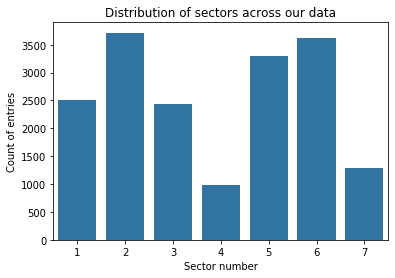

In [24]:
sns.barplot(df.Sector.value_counts().index, df.Sector.value_counts().values, color = sns.color_palette()[0]);
plt.xlabel('Sector number');
plt.ylabel('Count of entries');
plt.title('Distribution of sectors across our data');

As we can see above, there are apparently 7 sectors of Chile, and the distribution shows that we have less data for sector 4 and 7 than for the other sectors.

__In any case, since we will later on use Machine Learning to predict decisions upon the household market, we would need our training data to contain at least some households from each of the 7 sectors, and more importantly, the test data would need to be distributed with entries across these 7 sectors as well.__

#### 5. Cleaning `X and Y` coordinate columns

In [25]:
df.head()

,Household_ID,Sector,X,Y,Monthly_Rent,Household_Income,Expansion_Factor,Years_Education,Household_Type,Avg_Residential_Surface_Area,Avg_Construction_Quality,Total_Building_Density_per_Zone,KM_Nearest_Subway,KM_Nearest_Highway,CBD_Travel_Time,Avg_Zonal_Income,Commerce_Accessibility_PT,Education_Accessibility_PT,Household_Accessibility_PT,Industry_Accessibility_PT,Services_Accessibility_PT,Commerce_Accessibility_Car,Education_Accessibility_Car,Household_Accessibility_Car,Industry_Accessibility_Car,Services_Accessibility_Car,No_in_Cluster_7,No_in_Cluster_2
0,100010,7,335180.8019,6266420.975,100000,450845,136.393738,11,1,53.8,0.98,0.059,23.051711,4.345179,69,0.519765,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
1,100020,7,338410.2114,6265607.141,120000,1019369,73.843597,11,1,59.6,0.98,0.033,21.080177,1.381521,84,0.678317,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
2,100030,7,327863.8248,6257800.086,70000,80000,180.722809,10,1,59.5,0.98,0.004,34.147894,11.993389,83,0.408158,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
3,100041,7,327864.0000,6257800.000,80000,559259,150.379059,14,2,59.5,0.98,0.004,34.147817,11.993268,83,0.408158,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
4,100052,7,338480.8152,6267296.941,117771,710309,122.001518,12,2,43.6,0.98,0.086,19.908792,1.363177,94,0.498140,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1


As mentioned before, __X and Y are initially given in a UTM coordinate format.__ Since we would further like to do some plotting and mapping of our data, it will be much easier to work with universal Latitude-Longitude coordinates instead, since UTM coordinates not unique, they are dependent on a zone number and on northern/southern hemisphere.

After a thorough search, we have identified that Chile lies at the edge of UTM zone 19 (in the southern hemisphere), therefore we will use the UTM library in order to transform the coordinates to what was desired:

In [26]:
def create_lat_lon_from_UTM_coordinates(X, Y):
    return pd.Series(utm.to_latlon(X, Y, zone_number = 19, northern = False), index = ['Lat', 'Lon'])

In [27]:
# For each individual DataFrame entry, use the above function to convert the UTM coordinates to Lat-Lon coordinates
df[['Lat', 'Lon']] = df.apply(lambda row: create_lat_lon_from_UTM_coordinates(row.X, row.Y), axis = 1)

In [28]:
# Since the new Lat and Lon columns appear at the end of the Dataframe, we will move them back to their original position by shifting the positions of columns
df = pd.concat([df[df.columns[0:4]], df[df.columns[-2:]], df[df.columns[4:-2]]], axis = 1)

In [29]:
df.head()

,Household_ID,Sector,X,Y,Lat,Lon,Monthly_Rent,Household_Income,Expansion_Factor,Years_Education,Household_Type,Avg_Residential_Surface_Area,Avg_Construction_Quality,Total_Building_Density_per_Zone,KM_Nearest_Subway,KM_Nearest_Highway,CBD_Travel_Time,Avg_Zonal_Income,Commerce_Accessibility_PT,Education_Accessibility_PT,Household_Accessibility_PT,Industry_Accessibility_PT,Services_Accessibility_PT,Commerce_Accessibility_Car,Education_Accessibility_Car,Household_Accessibility_Car,Industry_Accessibility_Car,Services_Accessibility_Car,No_in_Cluster_7,No_in_Cluster_2
0,100010,7,335180.8019,6266420.975,-33.729444,-70.779035,100000,450845,136.393738,11,1,53.8,0.98,0.059,23.051711,4.345179,69,0.519765,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
1,100020,7,338410.2114,6265607.141,-33.737278,-70.744340,120000,1019369,73.843597,11,1,59.6,0.98,0.033,21.080177,1.381521,84,0.678317,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
2,100030,7,327863.8248,6257800.086,-33.805994,-70.859656,70000,80000,180.722809,10,1,59.5,0.98,0.004,34.147894,11.993389,83,0.408158,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
3,100041,7,327864.0000,6257800.000,-33.805995,-70.859654,80000,559259,150.379059,14,2,59.5,0.98,0.004,34.147817,11.993268,83,0.408158,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
4,100052,7,338480.8152,6267296.941,-33.722055,-70.743270,117771,710309,122.001518,12,2,43.6,0.98,0.086,19.908792,1.363177,94,0.498140,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1


This looks like a nice result. Now that our conversion is performed correctly, we no longer have the need for the `X` and `Y` columns, which tell us the same thing as the `Lat` and `Lon` columns. 

Therefore, we will drop these two columns:

In [30]:
df.drop(columns = ['X', 'Y'], inplace = True)

#### 6. Cleaning `Monthly_Rent` column

From now, most of the variables in our dataset will represent attributes about the household or the area in which the house is located. Therefore, we need to pay extra attention for missing values, errors and for the data distribution.

Let us check whether there is anyone who did not answer what their monthly rent is:

In [31]:
len(df[df.Monthly_Rent == 0.0])

0

Fortunately, it seems that such isn't the case. 

In order to take a look at the distribution of our variable, let us understand what values did the surveyed people most often respond within this column. We will have a look at the 10 most common and least common answers within our data:

In [32]:
print(df.Monthly_Rent.value_counts().iloc[0:10])

100000    1762
120000    1706
150000    1678
200000    1045
80000      835
130000     671
180000     638
140000     576
250000     550
70000      428
Name: Monthly_Rent, dtype: int64


In [33]:
print(df.Monthly_Rent.value_counts().iloc[-10:])

175343    1
130277    1
173278    1
122065    1
478403    1
142527    1
138425    1
126135    1
386230    1
169987    1
Name: Monthly_Rent, dtype: int64


From these results, we can infer the following idea: ___The most common answers people gave regarding their monthly rent were of approximate, rounded values.___ 

Fewer people indeed gave us more exact numbers, and, if you consider that a Machine Learning model needs to perform classification based on these answers, then we would want some level of uniformity of the distribution. 

Therefore, binning the small number unique responses into the larger "categories" of monthly rent will likely increase the smoothness of the distribution, and thus allow for better usage of this variable in prediction.

__This is how `Monthly_Rent` looks like before binning:__

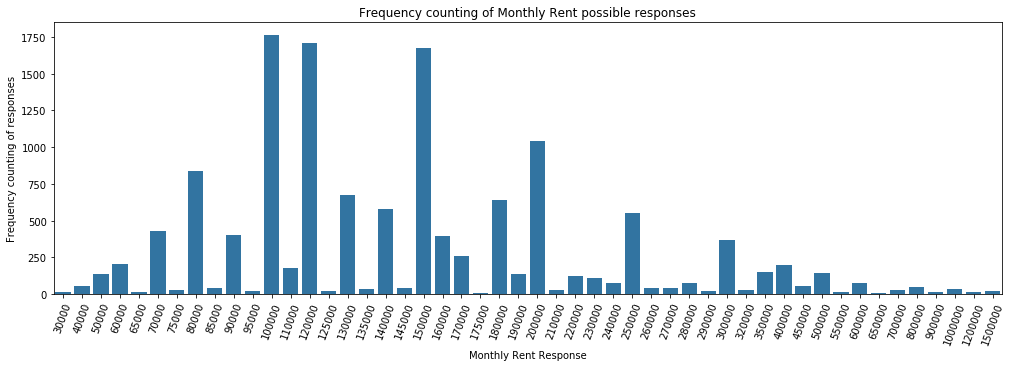

In [34]:
plt.figure(figsize = [17, 5]);
sns.barplot(x = df.Monthly_Rent.value_counts().iloc[0:50].index, y = df.Monthly_Rent.value_counts().iloc[0:50].values, color = sns.color_palette()[0]);
plt.xticks(rotation = 70);
plt.xlabel('Monthly Rent Response');
plt.ylabel('Frequency counting of responses');
plt.title('Frequency counting of Monthly Rent possible responses');

By creating a round-up function based on the respondents' pattern, we are better able to represent the data in a format which ___bins the value of rent in units of 10000 pesos.___

In [35]:
def roundup(x):
    if (x < pow(10,6)):
        if (x % 10000 >= 5000):
            return int(math.ceil(x / 10000.0)) * 10000 
        else:
            return int(math.floor(x / 10000.0)) * 10000
    else:
        if (x % 100000 >= 50000):
            return int(math.ceil(x / 100000.0)) * 100000
        else:
            return int(math.floor(x / 100000.0)) * 100000

In [36]:
df.Monthly_Rent = df.Monthly_Rent.apply(lambda value: roundup(value))

__This is how `Monthly_Rent` looks like after binning:__

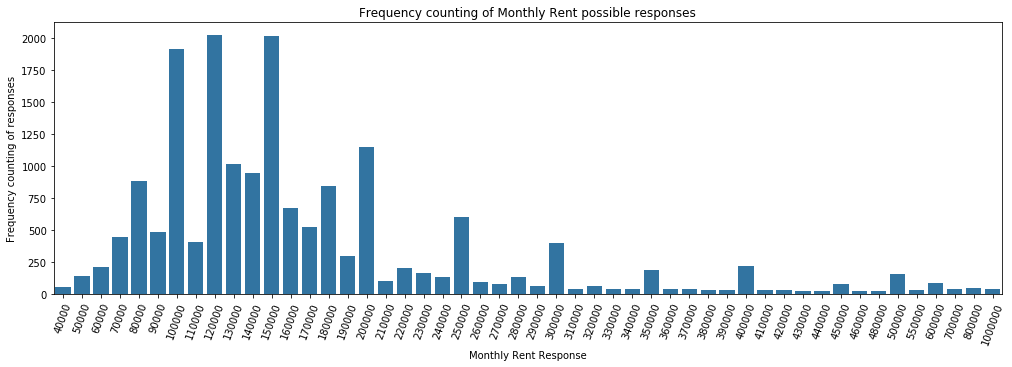

In [37]:
plt.figure(figsize = [17, 5]);
sns.barplot(x = df.Monthly_Rent.value_counts().iloc[0:50].index, y = df.Monthly_Rent.value_counts().iloc[0:50].values, color = sns.color_palette()[0]);
plt.xticks(rotation = 70);
plt.xlabel('Monthly Rent Response');
plt.ylabel('Frequency counting of responses');
plt.title('Frequency counting of Monthly Rent possible responses');

#### 7. Cleaning `Household_Income` column

For the next variables, we will use the same analysis pattern as for the `Monthly_Rent`, in order to make the analysis easier to follow:

Let us check the number of missing values:

In [38]:
len(df[df.Household_Income == 0.0])

3

__3 values are missing from this column.__ We have two choices now: either we throw away the data entry, or we replace the missing values with an appropriate measurement. Either of these seem reasonable, and, since we do not have too much data to begin with, we have decided to replace the missing values. 

___Since household income is a variable with a right-skewed distribution (meaning that there are more values of low income than high income, however the high income values can be quite large), we will get more representative results if we use the `MEDIAN` of the values than the `MEAN`, for replacing the missing entries.___

In [39]:
df.loc[(df.Household_Income == 0.0), 'Household_Income'] = round(df.Household_Income.median())

Let us take a look at the distribution of the values, as before:

In [40]:
print(df.Household_Income.value_counts().iloc[0:10])

300000    296
200000    226
400000    223
500000    213
250000    182
600000    173
350000    168
450000    139
700000    127
550000    104
Name: Household_Income, dtype: int64


In [41]:
print(df.Household_Income.value_counts().iloc[-10:])

1464948    1
896079     1
3089486    1
1129549    1
629833     1
1238086    1
808000     1
227990     1
435262     1
655360     1
Name: Household_Income, dtype: int64


It seems that we again have to deal with lots of answers represented with a multiple of 100000, yet few who also responded with exact values of their household rent. Since we anyway have constructed our previous function to deal with this issue, let us once again bin the household income values appropriately:

__This is how `Household_Income` looks like before binning:__

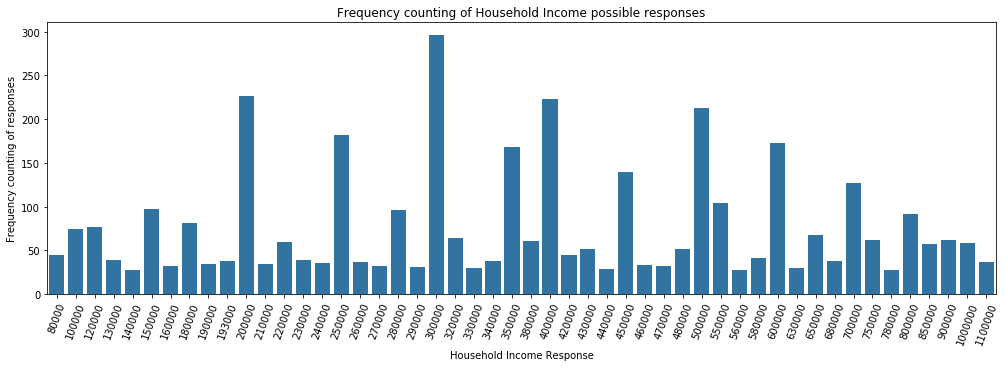

In [42]:
plt.figure(figsize = [17, 5]);
sns.barplot(x = df.Household_Income.value_counts().iloc[0:50].index, y = df.Household_Income.value_counts().iloc[0:50].values, color = sns.color_palette()[0]);
plt.xticks(rotation = 70);
plt.xlabel('Household Income Response');
plt.ylabel('Frequency counting of responses');
plt.title('Frequency counting of Household Income possible responses');

In [43]:
df.Household_Income = df.Household_Income.apply(lambda value: roundup(value))

In [44]:
# After rounding, some low values might have rounded to 0.0, so we will take care of that here:
df.loc[(df.Household_Income == 0.0), 'Household_Income'] = round(df.Household_Income.median())

__This is how `Household_Income` looks like after binning:__

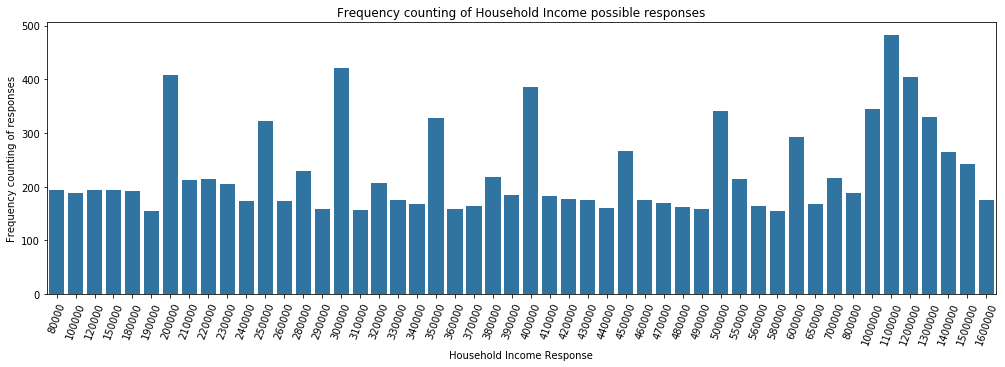

In [45]:
plt.figure(figsize = [17, 5]);
sns.barplot(x = df.Household_Income.value_counts().iloc[0:50].index, y = df.Household_Income.value_counts().iloc[0:50].values, color = sns.color_palette()[0]);
plt.xticks(rotation = 70);
plt.xlabel('Household Income Response');
plt.ylabel('Frequency counting of responses');
plt.title('Frequency counting of Household Income possible responses');

#### 8. Cleaning `Expansion_Factor` column

Let us check for any missing values:

In [46]:
len(df[df.Expansion_Factor == 0.0])

0

No missing values, great! And what are the most and least common expansion factors that we should expect here?

In [47]:
df.Expansion_Factor.value_counts().iloc[0:10]

91.342308     60
22.431303     53
58.807510     47
69.352577     44
124.340179    35
47.911781     33
70.047203     32
73.528168     28
95.274529     25
39.335964     25
Name: Expansion_Factor, dtype: int64

In [48]:
df.Expansion_Factor.value_counts().iloc[-10:]

121.618034    1
22.126963     1
95.900642     1
591.880005    1
224.270432    1
114.642769    1
185.485641    1
88.264801     1
49.926498     1
70.303154     1
Name: Expansion_Factor, dtype: int64

Unfortunately, the above distribution doesn't really tell us much, so __let's turn to a histogram for checking the distribtion of expansion factors__. We have selected, after multiple graphs, a separation with _70 bins_:

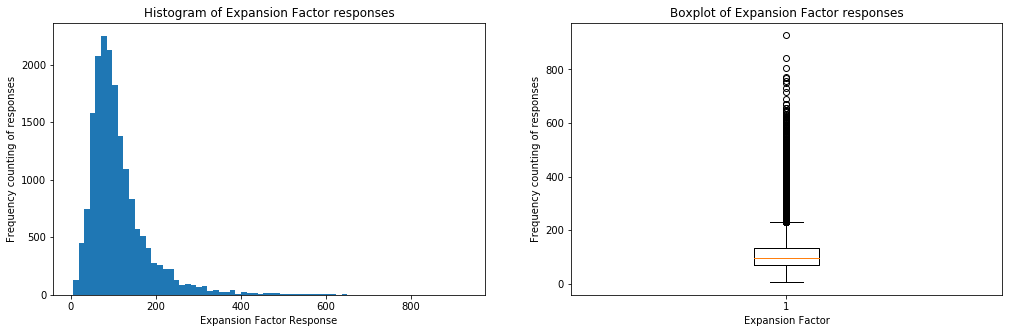

In [49]:
plt.figure(figsize = [17, 5])

plt.subplot(1, 2, 1)
plt.hist(df.Expansion_Factor, bins = 70);
plt.xlabel('Expansion Factor Response');
plt.ylabel('Frequency counting of responses');
plt.title('Histogram of Expansion Factor responses');

plt.subplot(1, 2, 2)
plt.boxplot(df.Expansion_Factor);
plt.xlabel('Expansion Factor');
plt.ylabel('Frequency counting of responses');
plt.title('Boxplot of Expansion Factor responses');

This histogram shows us that the Expansion Factor is having a ___clearly right skewed distribution___, and the boxplot compliments this assessment by showing us that the range of values between ~0 and 200 can be considered as common, and after that we have a lange number of outliers with factor values between ~200 to ~900. 

Since we do not have a clear idea regarding how exactly these factors have been measured and whether or not these outlier values are normal, we will leave this column without further manipulation, however now we are aware of the data representation of this column.

#### 9. Cleaning `Years_Education` column

As before, let us check and see whether there are missing values in this column. 

Here, we argue that even though it would be allowed to have households with __0 number of years of education__, having researched into the educational system of Chile, **OECD** (reference [here](https://www.oecd-ilibrary.org/docserver/9789264285637-5-en.pdf)) mentions that Chile has a number of 12 compulsory years of education, and even after the 1930s, 6 years of school were mandatory and state-subsidized.

Therefore, while we can expect some households to have less than 12 years of education due to their age and the previous social situation of the country, we would never expect a household to have _0 years of education_. Therefore, such values will be treated as ___missing values___.

In [50]:
len(df[df.Years_Education == 0.0])

258

It appears that we have a number of ___258___ missing values here, which is not too encouraging. Again, we have a choice to remove them or replace them with the median for this variable (which is 12 years of schooling). ___Since this variable is related to the household itself, and not to the housing, we will anyway not include this variable in our Machine Learning model, in order not to allow predictions regarding households based on properties of the household (which obviously have strong correlation). Therefore, we will replace the missing values with the median of the `Years_Education` column.___

In [51]:
df.loc[(df.Years_Education == 0.0), 'Years_Education'] = round(df.Years_Education.median())

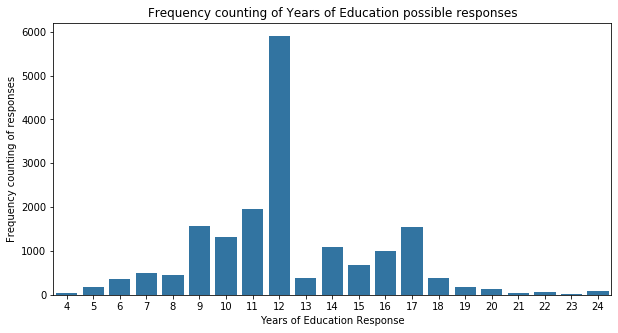

In [52]:
plt.figure(figsize = [10, 5])
sns.barplot(df.Years_Education.value_counts().index, df.Years_Education.value_counts().values, color = sns.color_palette()[0]);
plt.xlabel('Years of Education Response');
plt.ylabel('Frequency counting of responses');
plt.title('Frequency counting of Years of Education possible responses');

By checking the barplot above regarding the distribution of household education years in our data, we can see that the _vast majority of the surveyed population has the minimum of 12 years of schooling, with some people (presumably older ones) have 9+ schooling years and some (presumably the subset of people who pursued degree studies) have 14+ school years._

#### 10. Cleaning `Household_Type` column (_our model target variable_)

We need to be extra careful with the representation of this attribute, since it will become the target variable for our classification ML algorithms.

Let us check for any missing values and for the percentage distribution of each __class__ within our data.

In [53]:
len(df[df.Household_Type == 0.0])

0

In [54]:
df.Household_Type.value_counts()

2    7777
1    6627
3    3437
Name: Household_Type, dtype: int64

In [55]:
print('The percentage of household type 1 responses in the dataset is: %.2f%% of the total number of entries.' % (len(df[df.Household_Type == 1]) * 100 / len(df)))
print('The percentage of household type 2 responses in the dataset is: %.2f%% of the total number of entries.' % (len(df[df.Household_Type == 2]) * 100 / len(df)))
print('The percentage of household type 3 responses in the dataset is: %.2f%% of the total number of entries.' % (len(df[df.Household_Type == 3]) * 100 / len(df)))

The percentage of household type 1 responses in the dataset is: 37.14% of the total number of entries.
The percentage of household type 2 responses in the dataset is: 43.59% of the total number of entries.
The percentage of household type 3 responses in the dataset is: 19.26% of the total number of entries.


As we can see above, there are no missing values, and the classes in our data are represented in proportions approximative to __35%-45%-20%__, which are good distributions, since all the proportions are decently large enough to expect some variation in our data.

Taking a wild guess as to what these types might mean, based on their distribution across the population, we might have type 1, which are the poor families, type 2 being the average household with normal living standard, and type 3 being the wealthy households. This assumption is based on the social class distribution across the entire country of Chile, however it is a wild guess, and we will not base our analysis on it until we may have supporting evidence (if necessary).

#### 11. Cleaning `Avg_Residential_Surface_Area` column 

Let us check for missing values within the residential surface area variable.

___As we might expect, a value of 0 sq-meters probably refers to a missing value:___

In [56]:
len(df[df.Avg_Residential_Surface_Area == 0.0])

971

This is actually a high number of entries where the value is missing (~5% of the dataset). This is definitely not a good result, and we can't expect to throw ~5% of the dataset right away because of this. Instead, let us look at which values are most common, checked the skewedness of the distribution, and decide whether we should replace the missing values with either ___the mean___ or ___the median___.

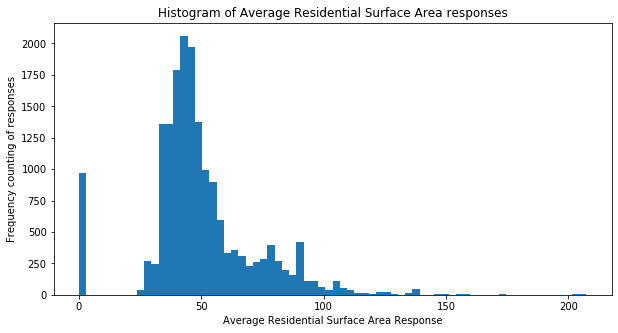

In [57]:
plt.figure(figsize = [10, 5])
plt.hist(df.Avg_Residential_Surface_Area, bins = 70);
plt.xlabel('Average Residential Surface Area Response');
plt.ylabel('Frequency counting of responses');
plt.title('Histogram of Average Residential Surface Area responses');

In [58]:
df.Avg_Residential_Surface_Area.value_counts().iloc[0:10]

0.0     971
42.6    364
46.4    207
42.5    200
44.9    190
40.5    189
43.6    185
51.7    183
35.5    177
89.6    176
Name: Avg_Residential_Surface_Area, dtype: int64

In [59]:
df.Avg_Residential_Surface_Area.value_counts().iloc[-10:]

107.1    1
104.1    1
68.4     1
83.9     1
86.0     1
167.3    1
183.1    1
130.0    1
138.5    1
69.8     1
Name: Avg_Residential_Surface_Area, dtype: int64

As we can see from the histogram above, this attribute has a right-skewed distribution, which tells us that __the median__ of the values is a better candidate for using in filling in the 0 sq-meters entries, as the mean is affected by the many large outliers within the data (_i.e. the tail_) and will give us a higher (erroneous) average area than the median does.

In [60]:
df.loc[(df.Avg_Residential_Surface_Area == 0.0), 'Avg_Residential_Surface_Area'] = df.Avg_Residential_Surface_Area.median()

#### 12. Cleaning `Avg_Construction_Quality` column 

Once again, let us see the distribution of the average construction quality measurement:

In [61]:
df.Avg_Construction_Quality.value_counts()

0.78    3716
0.36    3630
1.00    3296
0.93    2506
0.00    2430
0.98    1284
0.55     979
Name: Avg_Construction_Quality, dtype: int64

This time, we are met with very few value choices within the attribute (which we are not exactly sure how they were counted).

___What is slightly strange and worrying is that there are 2753 values of 0 in construction quality___. We are not sure whether this means that the value is missing, erroneous, or simply calculated correctly as such (_but, still, if the quality would be 0, would the house even be standing?_).

We are slightly concerned on the measurements of this variable, so we will leave it alone for now, however we must mention that we will be checking thoroughly for its predictive power when doing machine learning, and eventually removing it if not contributing to the model.

#### 13. Cleaning `Total_Building_Density_per_Zone` column 

Once again, let us check for any missing values:

In [62]:
len(df[df.Total_Building_Density_per_Zone == 0.0])

978

We again have a large number of missing values for this attribute, since it is not possible that the density of other building in the whole zone area to be 0.

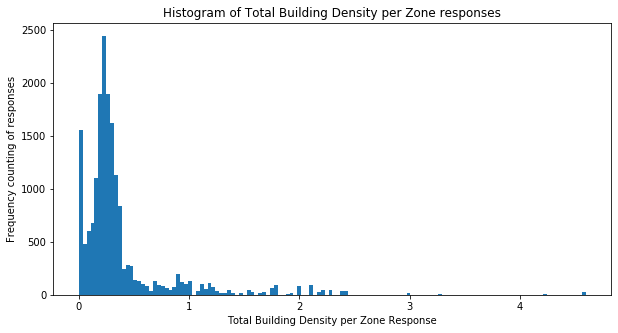

In [63]:
plt.figure(figsize = [10, 5])
plt.hist(df.Total_Building_Density_per_Zone, bins = 130);
plt.xlabel('Total Building Density per Zone Response');
plt.ylabel('Frequency counting of responses');
plt.title('Histogram of Total Building Density per Zone responses');

In [64]:
df.Total_Building_Density_per_Zone.value_counts().iloc[0:10]

0.000    978
0.247    412
0.160    283
0.272    276
0.237    248
0.220    227
0.005    207
0.375    194
0.106    174
0.264    171
Name: Total_Building_Density_per_Zone, dtype: int64

In [65]:
df.Total_Building_Density_per_Zone.value_counts().iloc[-10:]

0.046    3
0.110    2
0.433    2
0.350    2
0.176    2
0.023    1
0.066    1
0.323    1
1.013    1
0.067    1
Name: Total_Building_Density_per_Zone, dtype: int64

The histogram and the frequency counting above also show us that there is an outstanding number of missing values in what appears to be a right-skewed distribution of building densities. Therefore, as explained previously, we will use the median of this distribution to account for the missing values:

In [66]:
df.loc[(df.Total_Building_Density_per_Zone == 0.0), 'Total_Building_Density_per_Zone'] = df.Total_Building_Density_per_Zone.median()

#### 14. Cleaning `KM_Nearest_Subway` column 

In [67]:
len(df[df.KM_Nearest_Subway == 0.0])

0

Finally, we have a column which does not appear to have missing values. What range of values are most and least expected from this attribute?

In [68]:
df.KM_Nearest_Subway.value_counts()

7.431081     12
10.644616    10
9.106313      9
4.947447      9
9.106222      9
             ..
7.675433      1
8.061919      1
0.833694      1
3.009846      1
0.542744      1
Name: KM_Nearest_Subway, Length: 16620, dtype: int64

As we can see, almost each individual household has a different exact number of KM to the nearest subway (_which makes sense, since this value is calculated with 6 decimals, making it very improbable that two households would be exactly equally distant to a subway_).

No further cleanup seems to be required.

#### 15. Cleaning `KM_Nearest_Highway` column 

In [69]:
len(df[df.KM_Nearest_Highway == 0.0])

0

In [70]:
df.KM_Nearest_Highway.value_counts()

5.440625    12
8.974123    10
5.694528     9
7.301569     9
7.301575     9
            ..
1.031884     1
4.715210     1
1.877751     1
3.213027     1
4.802511     1
Name: KM_Nearest_Highway, Length: 16620, dtype: int64

Very similar to our previous attribute, we also have no missing attributes, and disparity between almost every entry measurement exists. 

No further cleanup seems to be required.

#### 15. Cleaning `CBD_Travel_Time` column 

In [71]:
len(df[df.CBD_Travel_Time == 0.0])

0

Fortunately, it seems that we don't have any missing values here either.

In [72]:
df.CBD_Travel_Time.value_counts()

68     647
60     594
59     579
67     480
53     453
      ... 
125     10
105     10
13       9
133      2
2        1
Name: CBD_Travel_Time, Length: 97, dtype: int64

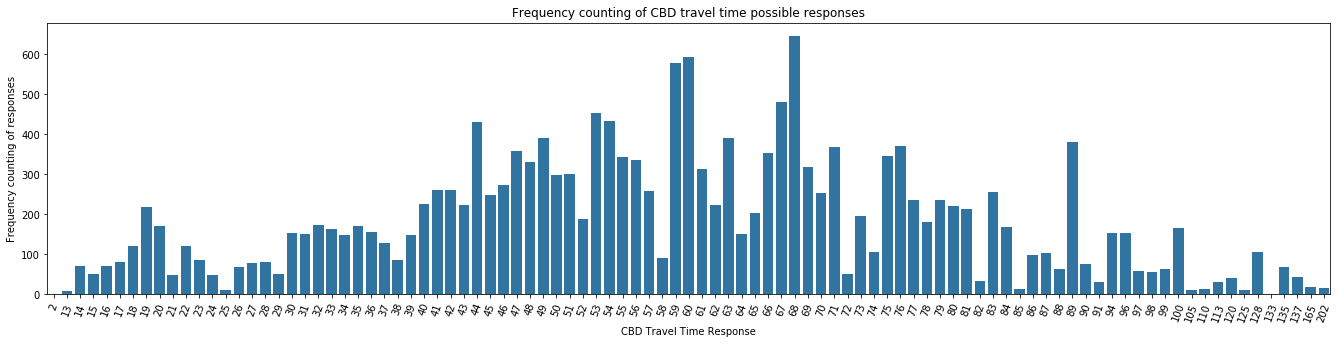

In [73]:
plt.figure(figsize = [23, 5]);
sns.barplot(x = df.CBD_Travel_Time.value_counts().index, y = df.CBD_Travel_Time.value_counts().values, color = sns.color_palette()[0]);
plt.xticks(rotation = 70);
plt.xlabel('CBD Travel Time Response');
plt.ylabel('Frequency counting of responses');
plt.title('Frequency counting of CBD travel time possible responses');

From the frequency histogram presented above, the distribution of travel time (in minutes) to the CBD (Central Business District) from any individual house seems to be well-represented, with ___most values residing between 40 and 80 minutes___ (which makes sense, since most people live somewhere in the suburbs of the city, and there is less housing in the CBD than there is outside it). 

We would consider making a more smooth binning function for the travel time presented here, however as we can see that, between consecutive units of time of 1 min distance (_e.g. between 33 min and 34 min_), the number of households reporting it seems to be almost the same, we would argue that these values might reflect a real-life data pattern that should be understood by the ML algorithm.

#### 16. Cleaning `Avg_Zonal_Income` column 

In [74]:
len(df[df.Avg_Zonal_Income == 0.0])

0

Once again, this attribute seems to be free from missing values.

In [75]:
df.Avg_Zonal_Income.value_counts()

0.421979    274
0.598732    177
0.691664    176
0.730312    169
0.673949    161
           ... 
0.385331      1
0.605629      1
0.373542      1
0.560000      1
0.498111      1
Name: Avg_Zonal_Income, Length: 786, dtype: int64

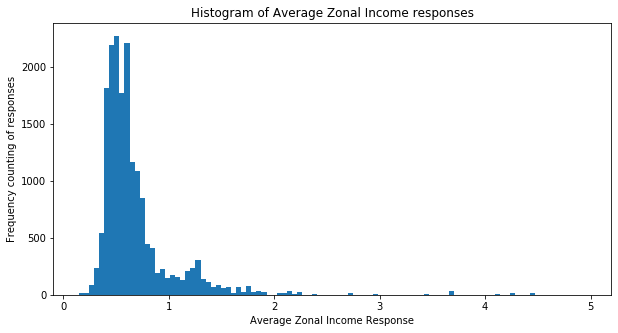

In [76]:
plt.figure(figsize = [10, 5])
plt.hist(df.Avg_Zonal_Income, bins = 100);
plt.xlabel('Average Zonal Income Response');
plt.ylabel('Frequency counting of responses');
plt.title('Histogram of Average Zonal Income responses');

From the distribution of the average zonal income within which a household is located, we can see that most of these values are between 0 and ~1.2, with very few scattered exceptional values which surpass ratios of 2.

___Normally, we always would need to check whether such outliers are really representative or erroneous,___ but since we do not know how this value was calculated (_and honestly speaking, we also are not sure why it's represented as a ratio_), we have decided to leave all the values as they are, without performing further processing.

#### 17. Cleaning the `Accessibility` columns (_separated by Transport Type: Public Transport (PT) or Car_)

Here, we will clean the data regarding all the __10 columns__ referring to the different kinds of accessibility that are measured: ___Commerce, Education, (other) Households, Industry and Services.___

In [77]:
print('The number of unique values of Commerce Accessibility by PT is: ' + str(len(df.Commerce_Accessibility_PT.value_counts())))
print('The number of unique values of Education Accessibility by PT is: ' + str(len(df.Education_Accessibility_PT.value_counts())))
print('The number of unique values of Household Accessibility by PT is: ' + str(len(df.Household_Accessibility_PT.value_counts())))
print('The number of unique values of Industry Accessibility by PT is: ' + str(len(df.Industry_Accessibility_PT.value_counts())))
print('The number of unique values of Services Accessibility by PT is: ' + str(len(df.Services_Accessibility_PT.value_counts())))

The number of unique values of Commerce Accessibility by PT is: 630
The number of unique values of Education Accessibility by PT is: 630
The number of unique values of Household Accessibility by PT is: 630
The number of unique values of Industry Accessibility by PT is: 630
The number of unique values of Services Accessibility by PT is: 630


In [78]:
print('The number of unique values of Commerce Accessibility by car is: ' + str(len(df.Commerce_Accessibility_Car.value_counts())))
print('The number of unique values of Education Accessibility by car is: ' + str(len(df.Education_Accessibility_Car.value_counts())))
print('The number of unique values of Household Accessibility by car is: ' + str(len(df.Household_Accessibility_Car.value_counts())))
print('The number of unique values of Industry Accessibility by car is: ' + str(len(df.Industry_Accessibility_Car.value_counts())))
print('The number of unique values of Services Accessibility by car is: ' + str(len(df.Services_Accessibility_Car.value_counts())))

The number of unique values of Commerce Accessibility by car is: 636
The number of unique values of Education Accessibility by car is: 634
The number of unique values of Household Accessibility by car is: 636
The number of unique values of Industry Accessibility by car is: 635
The number of unique values of Services Accessibility by car is: 635


It appears that the number of unique values for any kind of accessibility is (very close to) equal, which might refer to the fact that we measure all accessibility types with equal spacings between their values, even though the actual range of values for each individual accessibility type might be different (some have higher absolute values, some have lower).

In [79]:
print('The number of missing values from Commerce Accessibility by PT is: ' + str(len(df[df.Commerce_Accessibility_PT == 0.0])))
print('The number of missing values from Education Accessibility by PT is: ' + str(len(df[df.Education_Accessibility_PT == 0.0])))
print('The number of missing values from Household Accessibility by PT is: ' + str(len(df[df.Household_Accessibility_PT == 0.0])))
print('The number of missing values from Industry Accessibility by PT is: ' + str(len(df[df.Industry_Accessibility_PT == 0.0])))
print('The number of missing values from Services Accessibility by PT is: ' + str(len(df[df.Services_Accessibility_PT == 0.0])))

print()

print('The number of missing values from Commerce Accessibility by car is: ' + str(len(df[df.Commerce_Accessibility_Car == 0.0])))
print('The number of missing values from Education Accessibility by car is: ' + str(len(df[df.Education_Accessibility_Car == 0.0])))
print('The number of missing values from Household Accessibility by car is: ' + str(len(df[df.Household_Accessibility_Car == 0.0])))
print('The number of missing values from Industry Accessibility by car is: ' + str(len(df[df.Industry_Accessibility_Car == 0.0])))
print('The number of missing values from Services Accessibility by car is: ' + str(len(df[df.Services_Accessibility_Car == 0.0])))

The number of missing values from Commerce Accessibility by PT is: 0
The number of missing values from Education Accessibility by PT is: 0
The number of missing values from Household Accessibility by PT is: 0
The number of missing values from Industry Accessibility by PT is: 0
The number of missing values from Services Accessibility by PT is: 0

The number of missing values from Commerce Accessibility by car is: 0
The number of missing values from Education Accessibility by car is: 0
The number of missing values from Household Accessibility by car is: 0
The number of missing values from Industry Accessibility by car is: 0
The number of missing values from Services Accessibility by car is: 0


Fortunately, it appears that none of the attributes related to Accessibility measures has any data cleaning issues. 

_Since we will discuss about this set of variables much more in detail during the insight analysis part, we will now move further to the cleaning of the next attribute._

#### 17. Cleaning the `No_in_Cluster_2` and `No_in_Cluster_7` columns

As our very last 2 variables which need to be analyzed here, we can see that we have the representation of households if they were to make part of a K=2 cluster and a K=7 cluster, respectively. 

The K=7 cluster immediately makes us think of the 7 sectors of Santiago, and it makes us wonder: ___would the number of household entries that would be found in the clusters be similar to the one found in the sector distributions?___

In [80]:
df.No_in_Cluster_2.value_counts()

1    15283
2     2558
Name: No_in_Cluster_2, dtype: int64

In [81]:
df.No_in_Cluster_7.value_counts()

5    7863
2    3705
3    3258
6    1136
1     829
4     657
7     393
Name: No_in_Cluster_7, dtype: int64

In [82]:
df.Sector.value_counts()

2    3716
6    3630
5    3296
1    2506
3    2430
7    1284
4     979
Name: Sector, dtype: int64

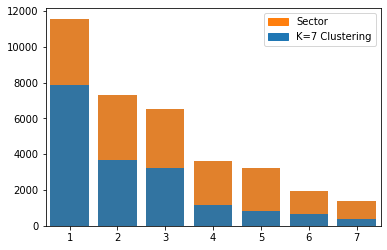

In [83]:
sns.barplot(x = np.arange(1,8,1), y = df.Sector.value_counts().values + df.No_in_Cluster_7.value_counts().values, color = sns.color_palette()[1], alpha = 1);
sns.barplot(x = np.arange(1,8,1), y = df.No_in_Cluster_7.value_counts().values, color = sns.color_palette()[0], alpha = 1);
plt.legend(handles = [patches.Patch(color = sns.color_palette()[1], label='Sector'), patches.Patch(color = sns.color_palette()[0], label = 'K=7 Clustering')]);

If we take a look at the frequency of the Clusters with the most elements and the Sectors with the most elements, sorted in descending order, we can see that the distributions of the counts do not seem similar for 5 out of 7 clusters/sectors. _Thus, it seems that we cannot draw any particular conclusion for a potential relation between the 7 Sectors of Chile and a clustering with 7 areas._

(_In the stacked bar plot above, the x-axis numbers "1, 2...." represent "the nth cluster and the nth sector, sorted by number of elements". For example, 2 means the 2nd biggest cluster (whichever that is) and the 2nd biggest sector, counting the number of elements. It does not mean sector 2 or cluster 2_).

---

<a id='insights'></a>
## Part 4: _<u>Insight Exploration</u>_

Now that we have understood our dataset much more clearly, and have cleaned and prepared the dataset for analysis, let us move on to answering some insightful questions about this dataset. 

There are two main questions that are of great interest to us within this project. __One is directly related to the nature of our Machine Learning task, and one is interesting from a feature correlation perspective.__

For our project, we have chosen the following ___2 research questions:___

__1.__ Considering that there are 10 different attributes pertaining to measuring accessibility, __what does the correlation between these 10 Accessibility attributes mean?__

   And, as sub-questions to this problem, we can ask:
   
   * _Are they all perhaps trying to show the same pattern?_ 
   * _What about correlation differences in measures between the PT and Car transport types?_
   * _If there is indeed strong correlation, perhaps we can get a general understanding of accessibility by just plotting one variable instead of 10?_
   
__2.__ Considering that, for our predictive ML task, it has been strictly specified that we should use a _test set_ between the boundary region of coordinates (33.4, 33.5) Lat & (-70.7, -70.6) Lon, we are concerned of the homogenity of the test data (within that border) in relation to the _training data_. __For our predictive challenge, how well does our ML test dataset resemble our training dataset?__

   And, as sub-questions to this problem, we can ask:
   
* _What is the reason why that specific border has been selected to be used as test dataset for our ML models?_

We will take these questions step-by-step, and answer them here, beginning with our 1st research question:

### Part 4.1: _<u>What does the correlation between the 10 Accessibility attributes mean?</u>_

In order for us to answer this question, we will create a new dataframe with a slightly different format, so that accessibility values are better grouped and delimited by the transport type (i.e. PT or Car).

In [84]:
access_df = pd.DataFrame({}, columns = ['Commerce_Accessibility', 'Education_Accessibility', 'Household_Accessibility', 'Industry_Accessibility', 'Services_Accessibility', 'Transport_Type'])

access_df['Commerce_Accessibility'] = np.hstack((np.array(df.Commerce_Accessibility_PT), np.array(df.Commerce_Accessibility_Car)))
access_df['Education_Accessibility'] = np.hstack((np.array(df.Education_Accessibility_PT), np.array(df.Education_Accessibility_Car)))
access_df['Household_Accessibility'] = np.hstack((np.array(df.Household_Accessibility_PT), np.array(df.Household_Accessibility_Car)))
access_df['Industry_Accessibility'] = np.hstack((np.array(df.Industry_Accessibility_PT), np.array(df.Industry_Accessibility_Car)))
access_df['Services_Accessibility'] = np.hstack((np.array(df.Services_Accessibility_PT), np.array(df.Services_Accessibility_Car)))

access_df.iloc[0:(len(access_df) // 2)]['Transport_Type'] = 'PT'
access_df.iloc[(len(access_df) // 2):]['Transport_Type'] = 'Car'

In [85]:
access_df.head()

,Commerce_Accessibility,Education_Accessibility,Household_Accessibility,Industry_Accessibility,Services_Accessibility,Transport_Type
0,704.97642,406.0983,6110.62492,671.08681,719.84272,PT
1,704.97642,406.0983,6110.62492,671.08681,719.84272,PT
2,704.97642,406.0983,6110.62492,671.08681,719.84272,PT
3,704.97642,406.0983,6110.62492,671.08681,719.84272,PT
4,704.97642,406.0983,6110.62492,671.08681,719.84272,PT


___Let us try and understand what is the correlation between the different measures of accessibily, separated by Transport Type:___

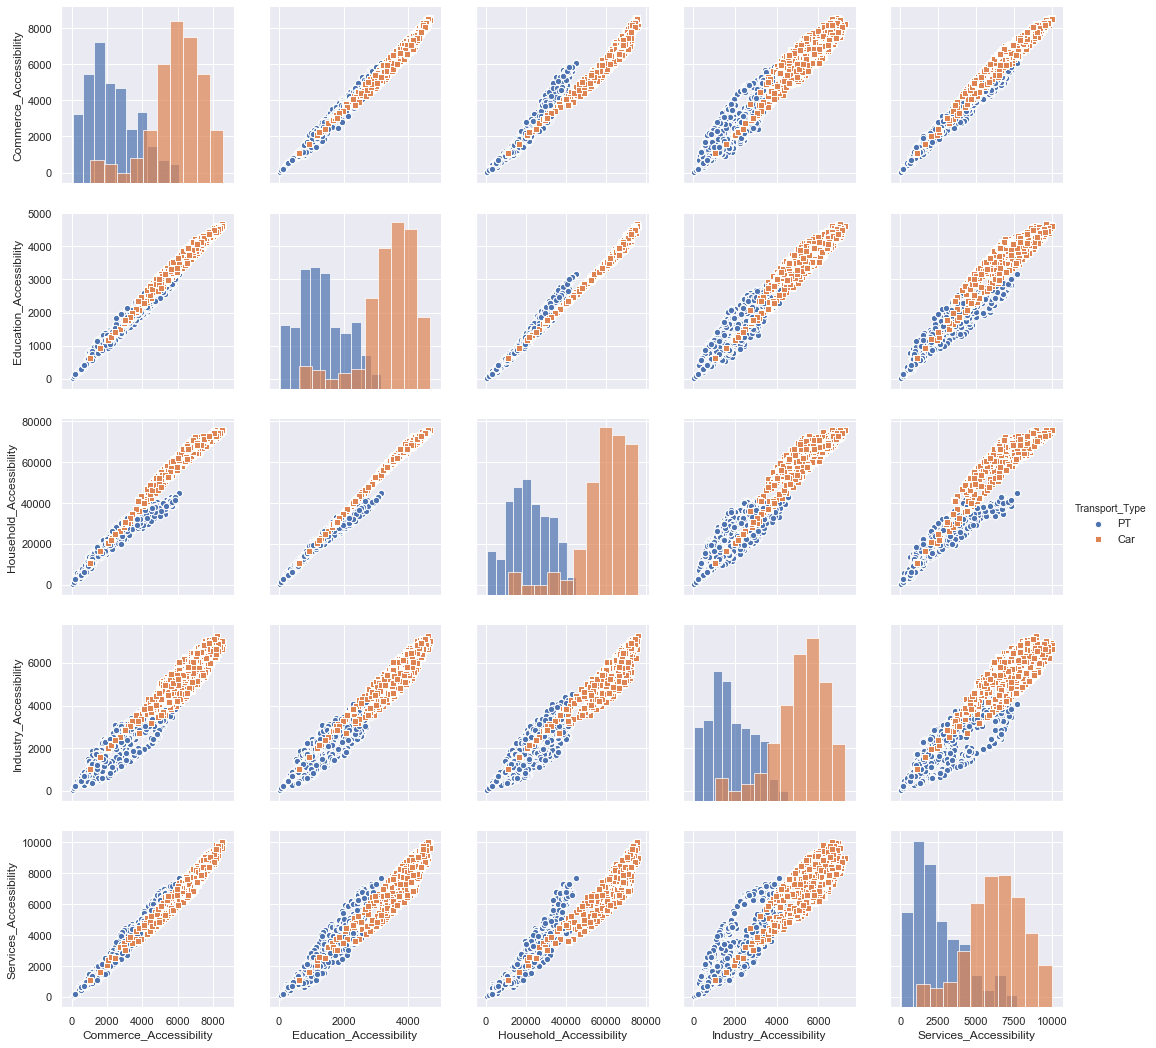

In [86]:
sns.set()

g = sns.PairGrid(access_df, hue = 'Transport_Type', hue_kws = {'marker': ["o", "s"]})
g.fig.set_size_inches(15, 15)
g = g.map_diag(plt.hist, edgecolor = 'w', alpha = 0.7)
g = g.map_offdiag(plt.scatter, edgecolor = "w", s = 40)
g = g.add_legend()

sns.set()

___This pair grid of plots allows us to understand the following aspects regarding our data:___

* ___The correlation between any two kinds of accessibilty measures seems to be very high,___ ranging from <u>almost identical</u> (e.g. see _Education <--> Household_ accessibility comparison) to <u>rather high scores</u> (e.g. "lowest" correlation between two measures seems to be between _Industry <--> Services_);
* By looking at the histogram distributions for any kind of measure, we can see that ___Public Transportation will always have lower expected range of values compared to the Car measures___;
* ___For any individual accessiblity measure, we can expect to see less variance in the distribution of the Car measurements, compared to the PT ones___ (since Car measurements mainly keep a straight line pattern, while the PT scatterpoints are represented with some slight curves in some of the measures);

In [87]:
class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

Data Visualisation is powerful, and, being honest with ourselves, we felt as if the above graph is packing a lot of information, and therefore may become a bit harder to read the conclusions off it. Therefore, keeping the same data and analysis pattern, we will want to represent the above pair grid of scatterplots into __two paired grids__ of accessibility measures, separated  by the transport type, one on the left side (___shown with blue dots___) representing measures of Public Transport type, and on the right side (___shown with orange squares___) representing Car type measures. 

Our visualization library, Seaborn, unfortunately does not easily allow subplotting of PairGrids, since they are in themselves an aggregation of subplots. Fortunately, through the code created above by _ImportanceOfBeingErnest_ from: https://stackoverflow.com/questions/35042255/how-to-plot-multiple-seaborn-jointplot-in-subplot, we were able to represent this pattern of data.

The conclusions you should take from the visualisation below are __the same__ as written above, however we argue that the joint paired grids of scatter plots (below) allows us to better illustrate the higher variance of the PT data across different measures, whereas Car type accessibility data keeps a more compact form, which reduces variance and increases corellation between the attributes:

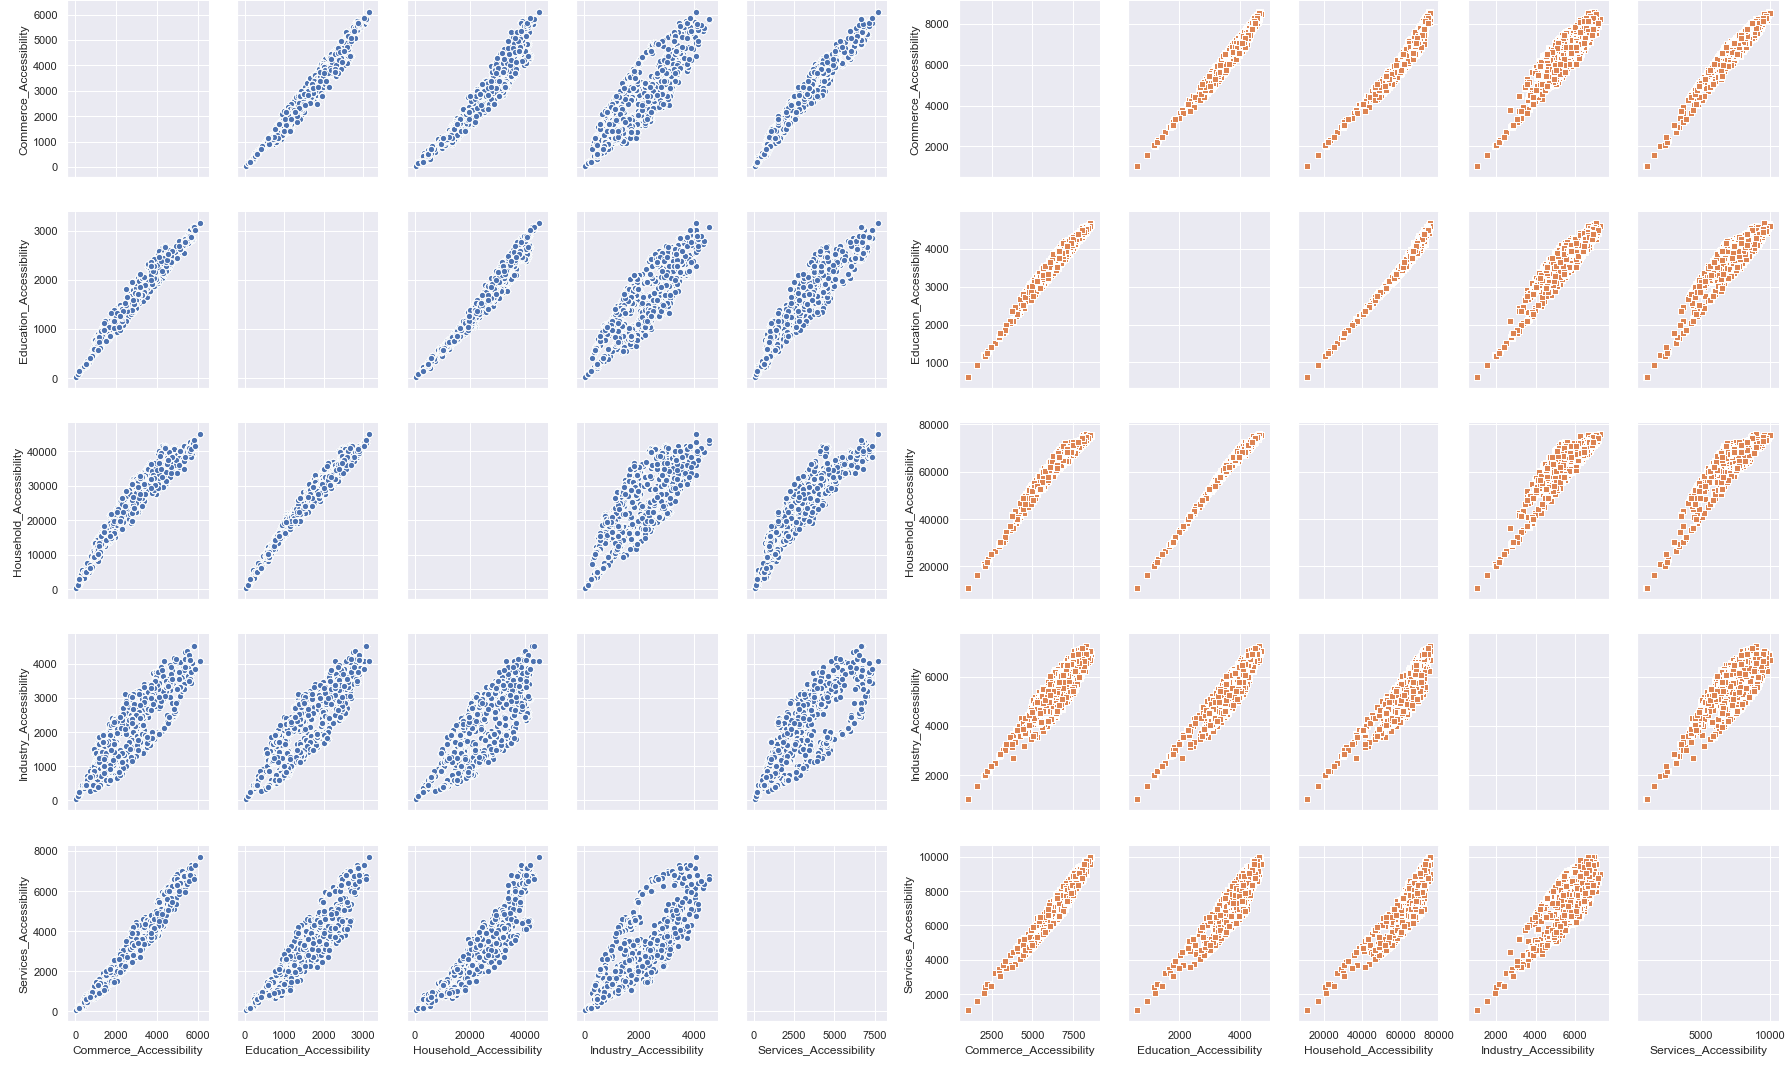

In [88]:
# The PairGrid corresponding to Public Transport accessibility
g1 = sns.PairGrid(access_df[access_df.Transport_Type == 'PT'])
g1.fig.set_size_inches(15, 15)
g1 = g1.map_offdiag(plt.scatter, edgecolor = "w", s = 40, color = sns.color_palette()[0], marker = 'o')
# g1 = g1.fig.suptitle('Scatterplot comparison of individual Accessibility measures within the PT category', y = 1.00)

# The PairGrid corresponding to Car accessibility
g2 = sns.PairGrid(access_df[access_df.Transport_Type == 'Car'])
g2.fig.set_size_inches(15, 15)
g2 = g2.map_offdiag(plt.scatter, s = 40, edgecolor = "w", color = sns.color_palette()[1], marker = 's')
# g2 = g2.fig.suptitle('Scatterplot comparison of individual Accessibility measures within the Car category', y = 1.00)

fig = plt.figure(figsize=(25, 15))
gs = gridspec.GridSpec(1, 2)

mg0 = SeabornFig2Grid(g1, fig, gs[0])
mg1 = SeabornFig2Grid(g2, fig, gs[1])

gs.tight_layout(fig)

plt.show()

In [89]:
# plt.figure(figsize = [12, 4])

# plt.subplot(1, 2, 1)
# sns.heatmap(df[['Commerce_Accessibility_PT', 'Education_Accessibility_PT', 'Household_Accessibility_PT', 'Industry_Accessibility_PT', 'Services_Accessibility_PT']].corr(), cmap = 'RdYlGn', annot = True, vmax = 1, vmin = 0.82, cbar = False);
# plt.title('Pair-wise correlation coefficients across attributes');

# # fix for mpl bug that cuts off top/bottom of seaborn viz
# b, t = plt.ylim() # discover the values for bottom and top
# b += 0.5 # Add 0.5 to the bottom
# t -= 0.5 # Subtract 0.5 from the top
# plt.ylim(b, t) # update the ylim(bottom, top) values

# ax = plt.subplot(1, 2, 2)
# sns.heatmap(df[['Commerce_Accessibility_Car', 'Education_Accessibility_Car', 'Household_Accessibility_Car', 'Industry_Accessibility_Car', 'Services_Accessibility_Car']].corr(), cmap = 'RdYlGn', annot = True, vmax = 1, vmin = 0.82);
# plt.title('Pair-wise correlation coefficients across attributes');

# # fix for mpl bug that cuts off top/bottom of seaborn viz
# b, t = plt.ylim() # discover the values for bottom and top
# b += 0.5 # Add 0.5 to the bottom
# t -= 0.5 # Subtract 0.5 from the top
# plt.ylim(b, t) # update the ylim(bottom, top) values

Lastly here, let us answer the pressing question: __Can we get a general understanding of Accessibility by just looking at a single variable rather than 10?__

The answer has been hinted many times previously from the correlation of the scatterplots, however let us put exact numbers to the correlation values with pairwise comparisons between each of the 10 accessibility measures:

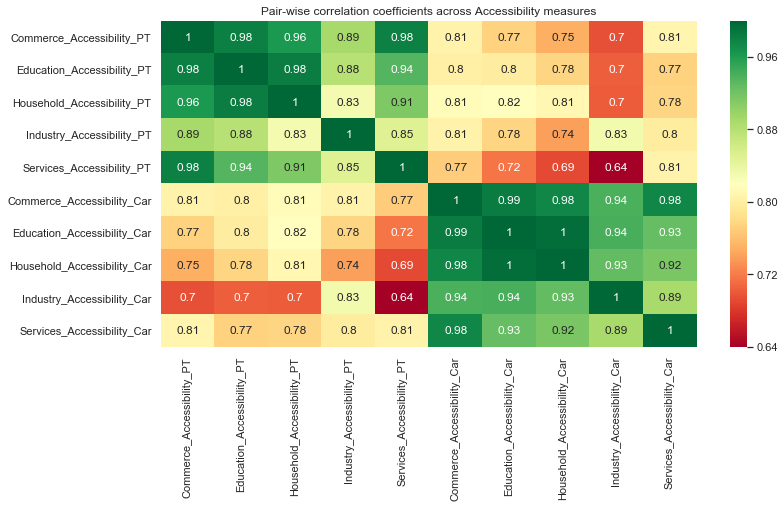

In [90]:
plt.figure(figsize = [12, 6])

sns.heatmap(df[['Commerce_Accessibility_PT', 'Education_Accessibility_PT', 'Household_Accessibility_PT', 'Industry_Accessibility_PT', 'Services_Accessibility_PT', 'Commerce_Accessibility_Car', 'Education_Accessibility_Car', 'Household_Accessibility_Car', 'Industry_Accessibility_Car', 'Services_Accessibility_Car']].corr(), cmap = 'RdYlGn', annot = True);
plt.title('Pair-wise correlation coefficients across Accessibility measures');

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t); # update the ylim(bottom, top) values

Considering the correlation heatmap above, we can see that:

* PT measures represent each other well, with correlations between two PT measures being __>= 0.83__;
* Car measures represent each other extremely well, with most correlations between __>= 0.95__, and the lowest correlation between two Car measures being __0.89__;
* Even when considering correlations between a PT measure and a Car measure, we can see a high correlation between most of the variables (_with the sole exception of the combination: Industry_Car <--> Services_PT_), and with correlation values of __>= 0.70__

Thus, from all the analysis done for this set of 10 variables, we have shown and can approve that, ___on a relative scale, if we take one of the 10 accessibility measures and plot its values across the zones of Santiago, we can have high confidence that there will be a similar relative distribution of accessibility for any other of the 10 measures presented here.___

_Later, we will also need to consider how this will influence our Machine Learning classification models, since we are introducing many attributes here which are highly correlated with each other, and that might increase the dimensionality of our data without any major benefits in prediction._

---

### Part 4.2: _<u>For our predictive challenge, how well does our ML test dataset resemble our training dataset?</u>_

In order to answer this question, let us actually separate our data into the two subsets (even though we will not do any ML algorithm training here):

In [91]:
test_df = df[(df.Lat >= -33.5) & (df.Lat <= -33.4) & (df.Lon >= -70.7) & (df.Lon <= -70.6)]
train_df = df[df.index.isin(test_df.index) == False]

Now that we have separated our data, we would be very interested in visualising the two subsets on a map, in order to understand more properly the boundary between the training and test data.

For this geospatial analysis task, we will use the power of the ___Folium library___, which is a wrapper Python library for __Leaflet.js__, a leading open-source JavaScript library for mobile-friendly interactive maps. Along the way, we will also leverage the power of the ___Fiona library___, which reads and writes geographic data files and thereby helps Python programmers integrate geographic information within their scripts and analyses. 

As a start, let's try to make a list of all the latitude and longitude points that we want to represent on the map. These points are the same ones that were shown in the example map from the Data Science Challenge description file.

In [92]:
lat_border = np.arange(-33.9, -33.0, 0.1)
lon_border = np.arange(-71.3, -70.3, 0.1)

line_lat_points = [[tuple((round(lat,1), round(lon,1))) for lat in lat_border] for lon in lon_border]
line_lon_points = [[tuple((round(lat,1), round(lon,1))) for lon in lon_border] for lat in lat_border]

In [93]:
santiago_central_lat_lon = [-33.4489, -70.6693]

In [94]:
# Here, we initialize a new Map object with Folium
m = folium.Map(
    location = santiago_central_lat_lon,
    tiles = 'CartoDB positron',
    prefer_canvas = True, zoom_start = 10)

# For a random sample of 1/3 of the total Test Dataset available, plot the entries as points with a location on the map corresponding to the Lat-Lon coordinates
for _, entry in test_df[['Sector', 'Lat', 'Lon']].sample(int(len(test_df) / 3)).iterrows():
    # Add circle to map
    folium.Circle(
        radius = 20,
        location = [entry.Lat, entry.Lon],
        popup = str('Sector %d' % int(entry.Sector)),
        color = 'red',
        fill = True,
    ).add_to(m)
    
# For a random sample of 1/3 of the total Train Dataset available, plot the entries as points with a location on the map corresponding to the Lat-Lon coordinates
for _, entry in train_df[['Sector', 'Lat', 'Lon']].sample(int(len(train_df) / 3)).iterrows():
    # Add circle to map
    folium.Circle(
        radius = 20,
        location = [entry.Lat, entry.Lon],
        popup = str('Sector %d' % int(entry.Sector)),
        color = 'blue',
        fill = True,
    ).add_to(m)

# Plot the Latitude lines on the map
for single_latitude_line_points in line_lat_points:
    folium.PolyLine(single_latitude_line_points, color = "grey", weight = 1, opacity = 1).add_to(m)

# Plot the longitude lines on the map
for single_longitude_line_points in line_lon_points:
    folium.PolyLine(single_longitude_line_points, color = "grey", weight = 1, opacity = 1).add_to(m)

# Must save the map to HTML first, in order for it to show inside the Jupyter Notebook
m.save('map_plot_1.html')

# Display the map within an IPython IFrame 
display(IFrame(src = 'map_plot_1.html', width = 1600, height = 800)) 

The boundaries of looks quite clear. ___However, why did we choose exactly that parcel of Santiago as our dataset?___

We have a hunch that, by looking at the distribution of households within each Sector, we will understand more:

In [95]:
folium_colors = ['purple', 'green', 'darkred', 'cadetblue', 'orange', 'blue', 'black']

m = folium.Map(
    location = santiago_central_lat_lon,
    tiles = 'CartoDB positron',
    prefer_canvas = True, zoom_start = 10)

for sector in range(1,8):
    sectored_df = df[df.Sector == sector][['Sector', 'Lat', 'Lon']].sample(int(len(df[df.Sector == sector]) / 3))
    for _, entry in sectored_df.iterrows():
        # Add circle to map
        folium.Circle(
            radius = 20,
            location = [entry.Lat, entry.Lon],
            popup = str('Sector %d' % int(entry.Sector)),
            color = folium_colors[sector-1],
            fill = True,
        ).add_to(m)

for single_latitude_line_points in line_lat_points:
    folium.PolyLine(single_latitude_line_points, color = "grey", weight = 1, opacity = 1).add_to(m)

for single_longitude_line_points in line_lon_points:
    folium.PolyLine(single_longitude_line_points, color = "grey", weight = 1, opacity = 1).add_to(m)

m.save('map_plot_2.html')

The code below has been copied from the mentioned reference in order to show a legend of the different Sectors of Santiago, and their colors: 

In [96]:
# This code is adapted from a wonderful reference from here:
# https://nbviewer.jupyter.org/gist/talbertc-usgs/18f8901fc98f109f2b71156cf3ac81cd
# --------------------------------------------------------------------------------

from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; left: 50px; top: 10px;'>
     
<div class='legend-title'>Sector Legend</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
  
    <li><span style='background:purple;opacity:0.7;'></span>Sector 1</li>
    <li><span style='background:green;opacity:0.7;'></span>Sector 2</li>
    <li><span style='background:darkred;opacity:0.7;'></span>Sector 3</li>
    <li><span style='background:cadetblue;opacity:0.7;'></span>Sector 4</li>
    <li><span style='background:orange;opacity:0.7;'></span>Sector 5</li>
    <li><span style='background:blue;opacity:0.7;'></span>Sector 6</li>
    <li><span style='background:black;opacity:0.7;'></span>Sector 7</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

m.get_root().add_child(macro)

m.save('map_test.html')

In [97]:
display(IFrame(src = 'map_plot_2.html', width = 1600, height = 800)) 

If we take a look at the map now, and at the distribution of data within the sectors, __it suddenly becomes very clear why the map patch was selected to be our test dataset: _because it is the only patch from this entire map which contains data of households from 6 out of 7 sectors!___ The only sector which is "missing" data from our test dataset is Sector 7 (which we can find by looking at the distinctive colors of the sectors and the _draggable!_ map legend).

Since we have been given a database file with Polygons representing the different zones of Santiago, we would like to plot this data upon our Folium map to better understand the properties of our households.

__However, we have identified that our database file contains encoding errors in some of the names of Santiago's districts, and also the coordinates of the polygons are in UTM, therefore needing conversion__. Let us deal with these issues first:

In [98]:
def clean_subzone_dbf_file(area_dbf):
    corrupted_words = ['ConchalÃ\x83Â\xad', 'EstaciÃ\x83Â³n Central', 'MaipÃ\x83Âº', 'PeÃ\x83Â±aflor', 'PeÃ\x83Â±alolÃ\x83Â©n', 'San JoaquÃ\x83Â\xadn', 'San RamÃ\x83Â³n', 'Ã\x83â\x80\x98uÃ\x83Â±oa']
    cleaned_words = ['Conchalí', 'Estación Central', 'Maipú', 'Peñaflor', 'Peñalolén', 'San Joaquín', 'San Ramón', 'Ñuñoa']
    
    for _, subzone in santiago_area_dbf.items():
        if subzone['properties']['Comuna'] in corrupted_words:
            subzone['properties']['Comuna'] = cleaned_words[corrupted_words.index(subzone['properties']['Comuna'])]
        
    return area_dbf

In [99]:
def convert_utm_list_to_lat_lon_coord(area_dbf):
    for _, subzone in area_dbf.items():
        subzone_coordinates = []
        
        for X, Y in subzone['geometry']['coordinates'][0]:
            subzone_coordinates.append(utm.to_latlon(X, Y, zone_number = 19, northern = False))
        
        subzone['geometry']['coordinates'] = subzone_coordinates
        
    return area_dbf

In [100]:
santiago_area_dbf = dict(fiona.open('ZonasEOD2012.dbf'))
santiago_area_dbf = clean_subzone_dbf_file(santiago_area_dbf)
santiago_area_dbf = convert_utm_list_to_lat_lon_coord(santiago_area_dbf)

m = folium.Map(
    location = santiago_central_lat_lon,
    tiles = 'CartoDB positron',
    prefer_canvas = True, zoom_start = 10)

for _, subzone in santiago_area_dbf.items():
#     subzone_coordinates = []
    
#     for X, Y in subzone['geometry']['coordinates'][0]:
#         subzone_coordinates.append(utm.to_latlon(X, Y, zone_number = 19, northern = False))

    subzone_coordinates = subzone['geometry']['coordinates']
        
    folium.PolyLine(subzone_coordinates, color = "red", weight = 0.5, opacity = 1).add_to(m)
    
    subzone_polygon = path.Path(subzone_coordinates)
    
    leftmost_lat = min([tuple_coord[0] for tuple_coord in subzone_coordinates])
    rightmost_lat = max([tuple_coord[0] for tuple_coord in subzone_coordinates])
    topmost_lon = max([tuple_coord[1] for tuple_coord in subzone_coordinates])
    bottommost_lon = min([tuple_coord[1] for tuple_coord in subzone_coordinates])
    
    subzone_filtered_df = df[(df.Lat >= leftmost_lat) & (df.Lat <= rightmost_lat) & (df.Lon <= topmost_lon) & (df.Lon >= bottommost_lon)][['Household_ID', 'Lat', 'Lon', 'Sector']]
    
    subzone_filtered_df = subzone_filtered_df[subzone_filtered_df.apply((lambda row: subzone_polygon.contains_points([row[['Lat', 'Lon']]])[0] == True), axis = 1)]
    
    for _, entry in subzone_filtered_df.sample(int(len(subzone_filtered_df) / 10)).iterrows():
        
        circle_popup_html = """
            <div style="background-color: #cfc ; padding: 10px; border: 1px solid green;">
            <p style = 'font-family: helvetica; font-size: 14px'>
                Zone Name: <b>%s</b>,<br><br>
                Subzone ID: <b>%d</b>,<br><br>
                Subzone Area (ha): <b>%.2f</b>,<br><br>
                Household ID: <b>%s</b>,<br><br>
                Sector: <b>%d</b>
            </p>
        """ % (subzone['properties']['Comuna'], 
               subzone['properties']['ID'], 
               subzone['properties']['AREA-Ha'], 
               entry['Household_ID'],
               int(entry.Sector))
        
        branca_iframe = branca.element.IFrame(html = circle_popup_html, width = 250, height = 250)
        popup = folium.Popup(branca_iframe, max_width = 500)
        
        # Add circle to map
        folium.Circle(
            radius = 20,
            location = [entry.Lat, entry.Lon],
            popup = popup,
            color = 'blue',
            fill = True,
        ).add_to(m)
        
    
for single_latitude_line_points in line_lat_points:
    folium.PolyLine(single_latitude_line_points, color = "blue", weight = 1, opacity = 1).add_to(m)

for single_longitude_line_points in line_lon_points:
    folium.PolyLine(single_longitude_line_points, color = "blue", weight = 1, opacity = 1).add_to(m)

m.save('map_plot_3.html')
display(IFrame(src = 'map_plot_3.html', width = 1600, height = 800)) 

___By extracting the data from the given Zone database file, we have managed to create a highly interactive map, where each of the points represents a household, and by clicking on it, the details of the zone, subzone and household ID are available for view.___ This also allows us to understand how much data from each zone do we have, but we must mention that we only plot here a _tenth_ of the total data, in order to avoid clogging both the map and the computer that performs its computations.



__Since this map has been achieved well, let us combine all our previous efforts in visualising the Sector data of Santiago into this highly interactive format:__

In [101]:
folium_colors = ['purple', 'green', 'darkred', 'cadetblue', 'orange', 'blue', 'black']

santiago_area_dbf = dict(fiona.open('ZonasEOD2012.dbf'))

santiago_area_dbf = clean_subzone_dbf_file(santiago_area_dbf)

santiago_area_dbf = convert_utm_list_to_lat_lon_coord(santiago_area_dbf)

m = folium.Map(
    location = santiago_central_lat_lon,
    tiles = 'CartoDB positron',
    prefer_canvas = True, zoom_start = 10)


for _, subzone in santiago_area_dbf.items():
#     subzone_coordinates = []

#     for X, Y in subzone['geometry']['coordinates'][0]:
#         subzone_coordinates.append(utm.to_latlon(X, Y, zone_number = 19, northern = False))

    subzone_coordinates = subzone['geometry']['coordinates']
    
    folium.PolyLine(subzone_coordinates, color = "red", weight = 0.5, opacity = 1).add_to(m)

    subzone_polygon = path.Path(subzone_coordinates)

    leftmost_lat = min([tuple_coord[0] for tuple_coord in subzone_coordinates])
    rightmost_lat = max([tuple_coord[0] for tuple_coord in subzone_coordinates])
    topmost_lon = max([tuple_coord[1] for tuple_coord in subzone_coordinates])
    bottommost_lon = min([tuple_coord[1] for tuple_coord in subzone_coordinates])
        
    for sector in range(1,8):

        subzone_filtered_df = df[(df.Lat >= leftmost_lat) & (df.Lat <= rightmost_lat) & (df.Lon <= topmost_lon) & (df.Lon >= bottommost_lon) & (df.Sector == sector)][['Household_ID', 'Lat', 'Lon', 'Sector']]
        subzone_filtered_df = subzone_filtered_df[subzone_filtered_df.apply((lambda row: subzone_polygon.contains_points([row[['Lat', 'Lon']]])[0] == True), axis = 1)]

        for _, entry in subzone_filtered_df.sample(int(len(subzone_filtered_df) / 3)).iterrows():

            circle_popup_html = """
                <div style="background-color: #cfc ; padding: 10px; border: 1px solid green;">
                <p style = 'font-family: helvetica; font-size: 14px'>
                    Zone Name: <b>%s</b>,<br><br>
                    Subzone ID: <b>%d</b>,<br><br>
                    Subzone Area (ha): <b>%.2f</b>,<br><br>
                    Household ID: <b>%s</b>,<br><br>
                    Sector: <b>%d</b>
                </p>
            """ % (subzone['properties']['Comuna'], 
                   subzone['properties']['ID'], 
                   subzone['properties']['AREA-Ha'], 
                   entry['Household_ID'],
                   int(entry.Sector))

            branca_iframe = branca.element.IFrame(html = circle_popup_html, width = 250, height = 250)
            popup = folium.Popup(branca_iframe, max_width = 500)

            # Add circle to map
            folium.Circle(
                radius = 20,
                location = [entry.Lat, entry.Lon],
                popup = popup,
                color = folium_colors[sector-1],
                fill = True,
            ).add_to(m)
        
    
for single_latitude_line_points in line_lat_points:
    folium.PolyLine(single_latitude_line_points, color = "blue", weight = 1, opacity = 1).add_to(m)

for single_longitude_line_points in line_lon_points:
    folium.PolyLine(single_longitude_line_points, color = "blue", weight = 1, opacity = 1).add_to(m)

m.save('map_plot_4.html')
display(IFrame(src = 'map_plot_4.html', width = 1600, height = 800)) 

Through this interactive visualization, we can quickly and easily check multiple sets of households from different zones and sectors, and, having done so, this reinforced our conclusion that the geographical boundary for the test dataset of our challenge is the one patch of data which indeed best resembles our training dataset.

---

<a id='dataaug'></a>
## Part 5: _<u>Data Augmentation</u>_

Considering that now we have parsed and formatted the DBF file corresponding to the zones of Santiago, we realized: __Our original dataset has many attributes related to zone measurements, however we do not actually know in which zones do the different households lie.__ Perhaps this is not the most important question, since this would be a variable that would strongly correlate with any other measurements related to a specific zone.

However, we have decided to augment our dataset with trying to understand, for each particular household, what is the ___dataset density by zone area___, the ___dataset density by subzone area___, and their ratio.

More precisely, the ___dataset density by zone area___ refers to the number of houses present within the total area size (in Ha) of the zone. While you can consider it a relative measure, since not all houses have the same size, we argue that this measurement gives you a relative idea of how much of an area (in percentage) is it represented by houses which are present in our dataset. This means that the closer this value will be 1, the more houses we will have stored in our dataset from a particular zone, so the more likely we are to have a clear picture of the housing situation within that zone (since we have more data from the zone). Similarily, the ___dataset density by subzone area___ is the number of houses present within the total area of a subzone. 

In [102]:
zones_total_area_dict = {}

for _, subzone in santiago_area_dbf.items():
    if (subzone['properties']['Comuna'] not in zones_total_area_dict):
        zones_total_area_dict[subzone['properties']['Comuna']] = subzone['properties']['AREA-Ha']
    else:
        zones_total_area_dict[subzone['properties']['Comuna']] += subzone['properties']['AREA-Ha']
        
for name, value in zones_total_area_dict.items():
    zones_total_area_dict[name] = round(value, 2)

In [103]:
for _, subzone in santiago_area_dbf.items():
    subzone_coordinates = subzone['geometry']['coordinates']
    
    subzone_polygon = path.Path(subzone_coordinates)
    
    leftmost_lat = min([tuple_coord[0] for tuple_coord in subzone_coordinates])
    rightmost_lat = max([tuple_coord[0] for tuple_coord in subzone_coordinates])
    topmost_lon = max([tuple_coord[1] for tuple_coord in subzone_coordinates])
    bottommost_lon = min([tuple_coord[1] for tuple_coord in subzone_coordinates])
    
    subzone_filtered_df = df[(df.Lat >= leftmost_lat) & (df.Lat <= rightmost_lat) & (df.Lon <= topmost_lon) & (df.Lon >= bottommost_lon)]
    subzone_filtered_df = subzone_filtered_df[subzone_filtered_df.apply((lambda row: subzone_polygon.contains_points([row[['Lat', 'Lon']]])[0] == True), axis = 1)]
    
    df.loc[subzone_filtered_df.index, 'Zone_Name'] = subzone['properties']['Comuna']
    df.loc[subzone_filtered_df.index, 'Zone_Area'] = zones_total_area_dict[subzone['properties']['Comuna']]
    df.loc[subzone_filtered_df.index, 'Subzone_ID'] = subzone['properties']['ID']
    df.loc[subzone_filtered_df.index, 'Subzone_Area'] = subzone['properties']['AREA-Ha']

In [104]:
df.dropna(axis = 0, inplace = True)
df.Subzone_ID = df.Subzone_ID.astype(int)

In [105]:
for _, subzone in santiago_area_dbf.items():
    subzone_filtered_df = df[df.Subzone_ID == subzone['properties']['ID']]
    
    dataset_density_by_zone_area = len(df[df.Zone_Name == subzone['properties']['Comuna']]) / zones_total_area_dict[subzone['properties']['Comuna']]
    dataset_density_by_subzone_area = len(df[df.Subzone_ID == subzone['properties']['ID']]) / subzone['properties']['AREA-Ha']
    
    df.loc[subzone_filtered_df.index, 'Dataset_Density_by_Zone_Area'] = dataset_density_by_zone_area
    df.loc[subzone_filtered_df.index, 'Dataset_Density_by_Subzone_Area'] = dataset_density_by_subzone_area
    df.loc[subzone_filtered_df.index, 'Dataset_Coverage_of_Zone_by_Subzone'] = dataset_density_by_subzone_area * dataset_density_by_zone_area

__Moreover, in order to increase the chances that we have relevant attributes in our dataset which can be good separators for what household types buy houses in different areas of the city, we will use the power of _OpenSourceMaps_ in order to collect data about places of interest (POI) near and around the neighbourhood of each individual house, which should provide easy access to them.__

We will use a radius of 0.1 units, which corresponds to approximatively 11.4 km as the circular area surrounding the houses, in which we will perform our search for parameters.

In [104]:
r = 0.1 # approximately 11.4 km 

def retrieveData(obj):
    overpass_url = "http://overpass-api.de/api/interpreter"
    overpass_query = """
                        [out:json];
                        {0}({1},{2},{3},{4});
                        out center;
                     """.format(obj, min(df.Lat)-r, min(df.Lon)-r, max(df.Lat)+r, max(df.Lon)+r)
    
    response = requests.get(overpass_url, params={'data': overpass_query})
    return response.json()

def addCol(data):
    if data['elements'][0]['type'] == 'way':
        data = pd.DataFrame(list(pd.DataFrame(data['elements'])['center']))
    elif data['elements'][0]['type'] == 'node':
        data = pd.DataFrame(data['elements'])
        
    col = []
    for _, house in df.iterrows():
        count = 0
        for _, rest in data.iterrows():
            if house.Lat-r <= rest.lat<=house.Lat+r and house.Lon-r <= rest.lon <= house.Lon+r:
                count += 1
        col.append(count)
    return col

We will append to the dataframe a list of amenities which we might find relevant for separating different classes of people in general throughout the world, making an inference that they will also be relevant in our context.

___We have selected as POIs: restaurants, Churches, libraries, schools, convenience stores, cinemas, shopping centres (malls), bars, parks and industrial centres.___

In [69]:
# Will take lots of time to extract the data!! 
res = retrieveData('node["amenity" = "restaurant"]')
df['Nr_restaurants'] = addCol(res)

In [10]:
chu = retrieveData('node["amenity" = "place_of_worship"]')
df['Nr_churches'] = addCol(chu)

In [11]:
lib = retrieveData('node["amenity" = "library"]')
df['Nr_libraries'] = addCol(lib)

In [49]:
sch = retrieveData('node["amenity" = "school"]')
df['Nr_schools'] = addCol(sch)

In [20]:
sup = retrieveData('node["shop" = "supermarket"]')
df['Nr_supermarkets'] = addCol(sup)

In [27]:
cin = retrieveData('node["amenity" = "cinema"]')
df['Nr_cinemas'] = addCol(cin)

In [30]:
mal = retrieveData('node["shop" = "mall"]')
df['Nr_malls'] = addCol(mal)

In [46]:
bar = retrieveData('node["amenity" = "bar"]')
df['Nr_bars'] = addCol(bar)

In [72]:
par = retrieveData('node["leisure" = "park"]')
df['Nr_parks'] = addCol(par)

In [105]:
ind = retrieveData('way["landuse" = "industrial"]')
df['Nr_industrial'] = addCol(ind) # number of industrial nuclei

_With this augmentation of our dataset, we are ready to explore future data modeling for inputting into Machine Learning models, and performing predictions upon our data, in the next notebook._

Lastly, after performing this augmentation, we will store the final data within a CSV file:

In [106]:
df.to_csv('Households_Data_Processed.csv', index = False)

---

<a id='ending'></a>
## Part 6: _<u>Conclusion</u>_

___As a conclusion to our Exploratory notebook, we have formatted, cleaned, augmented and generated insights from our dataset within this detailed Descriptive Notebook.___

__In regards to the research questions asked in this notebook, we have found the following information:__

1. For Research Question 1:
 * _The 10 accessibility measures present in this dataset are all strongly correlated between each other._
 * _Regardless of whether we compare two measures from the same Transport Type, or whether we compare two measures from different Transport Types, there will be a significant similarity in the relative pattern of association between these variables, indicating the strong correlation._
 * _Many times, the zones of Santiago will report a lower Accessibility for Public Transport than for cars. If PT accessibility is high, then definitely Car accessibility is also high. Likewise, if Car accessibility is low, then definitely PT accessibility will also be low._
 * _We need to watch out for the strong collinearity of these 10 variables when introducing them into our ML datasets._
 
 
2. For Research Question 2:
 * _We have found out that the geographical boundary for the test dataset has been selected since it best represents the training dataset by having included data from 6 out of 7 sectors of Santiago de Chile._
 
In our second notebook, we will delve into converting the data into matrix-ready form for the ML algorithms to ingest, and perform all the necessary steps for training ML classification algorithms which will predict the household types from the data analyzed and manipulated here. 

---

_Group Workload Distribution:_

- _Part 1: Shalaka, Blanca_
- _Part 2: Sebastian, Blanca_
- _Part 3: Sebastian, Blanca_
- _Part 4: Shalaka, Sebastian_
- _Part 5: Sebastian, Blanca_
- _Part 6: Shalaka, Blanca_